## Importing Libraries

In [2]:
import sqlite3
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing datasets

* Mounting google colab notebook with google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


* Kaggle Dataset
https://www.kaggle.com/datasets/harsha547/ipldatabase

In [4]:
Ball_by_Ball = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Ball_by_Ball.csv")
Batsman_Scored = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Batsman_Scored.csv")
BattingStyle = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/BattingStyle.csv")
Bowling_Style = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Bowling_Style.csv")
City = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/City.csv")
Country = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Country.csv")
Extra_Runs = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Extra_Runs.csv")
Extra_Type = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Extra_Type.csv")
Match = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Match.csv")
Out_Type = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Out_Type.csv")
Outcome = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Outcome.csv")
Player = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Player.csv")
Player_Match = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Player_Match.csv")
Rolee = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Rolee.csv")
Season = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Season.csv")
Team = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Team.csv")
Toss_Decision = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Toss_Decision.csv")
Umpire = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Umpire.csv")
Venue = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Venue.csv")
Wicket_Taken = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Wicket_Taken.csv")
Win_By = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/Win_By.csv")
sysdiagrams = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/CSV_files/sysdiagrams.csv")

Connecting to Database SQLite

In [5]:
conn = sqlite3.connect("/content/gdrive/MyDrive/Datasets/IE6700 Project/database.sqlite")

In [6]:
c = conn.cursor()

## Part 1: SQL Analysis

#### Display SQL Data

In [ ]:
sql = """
SELECT * FROM Ball_by_Ball
"""
pd.read_sql(sql, conn).head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler
0,335987,1,1,1,1,2,1,1,2,14
1,335987,1,1,2,2,1,1,6,7,106
2,335987,1,2,1,1,2,2,2,1,14
3,335987,1,2,2,2,1,2,7,6,106
4,335987,1,3,1,1,2,2,2,1,14


In [ ]:
sql = """
SELECT * FROM Batsman_Scored
"""
pd.read_sql(sql, conn).head()

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Innings_No
0,335987,1,1,0,1
1,335987,1,1,1,2
2,335987,1,2,0,1
3,335987,1,3,0,2
4,335987,1,4,0,1


In [ ]:
sql = """
SELECT * FROM Batting_Style
"""
pd.read_sql(sql, conn).head()

,Batting_Id,Batting_hand
0,1,Left-hand bat
1,2,Right-hand bat


In [ ]:
sql = """
SELECT * FROM Bowling_Style
"""
pd.read_sql(sql, conn).head()

,Bowling_Id,Bowling_skill
0,1,Right-arm medium
1,2,Right-arm offbreak
2,3,Right-arm fast-medium
3,4,Legbreak googly
4,5,Right-arm medium-fast


In [ ]:
sql = """
SELECT * FROM City
"""
pd.read_sql(sql, conn).head()

,City_Id,City_Name,Country_id
0,1,Bangalore,1
1,2,Chandigarh,1
2,3,Delhi,1
3,4,Mumbai,1
4,5,Kolkata,1


In [ ]:
sql = """
SELECT * FROM Country
"""
pd.read_sql(sql, conn).head()

,Country_Id,Country_Name
0,1,India
1,2,South Africa
2,3,U.A.E
3,4,New Zealand
4,5,Australia


In [ ]:
sql = """
SELECT * FROM Extra_Runs
"""
pd.read_sql(sql, conn).head()

,Match_Id,Over_Id,Ball_Id,Extra_Type_Id,Extra_Runs,Innings_No
0,335987,1,1,1,1,1
1,335987,1,2,2,1,2
2,335987,1,3,2,1,1
3,335987,1,7,1,1,1
4,335987,2,3,1,4,2


In [ ]:
sql = """
SELECT * FROM Extra_Type
"""
pd.read_sql(sql, conn).head()

,Extra_Id,Extra_Name
0,1,legbyes
1,2,wides
2,3,byes
3,4,noballs
4,5,penalty


In [ ]:
sql = """
SELECT * FROM Match
"""
pd.read_sql(sql, conn).head()

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0


In [ ]:
sql = """
SELECT * FROM Out_Type
"""
pd.read_sql(sql, conn).head()

,Out_Id,Out_Name
0,1,caught
1,2,bowled
2,3,run out
3,4,lbw
4,5,retired hurt


In [ ]:
sql = """
SELECT * FROM Outcome
"""
pd.read_sql(sql, conn).head()

,Outcome_Id,Outcome_Type
0,1,Result
1,2,No Result
2,3,Superover


In [ ]:
sql = """
SELECT * FROM Player
"""
pd.read_sql(sql, conn).head()

,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6


In [ ]:
sql = """
SELECT * FROM Player_Match
"""
pd.read_sql(sql, conn).head()

,Match_Id,Player_Id,Role_Id,Team_Id
0,335987,1,1,1
1,335987,2,3,1
2,335987,3,3,1
3,335987,4,3,1
4,335987,5,3,1


In [ ]:
sql = """
SELECT * FROM Rolee
"""
pd.read_sql(sql, conn).head()

,Role_Id,Role_Desc
0,1,Captain
1,2,Keeper
2,3,Player
3,4,CaptainKeeper


In [ ]:
sql = """
SELECT * FROM Season
"""
pd.read_sql(sql, conn).head()

,Season_Id,Man_of_the_Series,Orange_Cap,Purple_Cap,Season_Year
0,1,32,100,102,2008
1,2,53,18,61,2009
2,3,133,133,131,2010
3,4,162,162,194,2011
4,5,315,162,190,2012


In [ ]:
sql = """
SELECT * FROM Team
"""
pd.read_sql(sql, conn).head()

,Team_Id,Team_Name
0,1,Kolkata Knight Riders
1,2,Royal Challengers Bangalore
2,3,Chennai Super Kings
3,4,Kings XI Punjab
4,5,Rajasthan Royals


In [ ]:
sql = """
SELECT * FROM Toss_Decision
"""
pd.read_sql(sql, conn).head()

,Toss_Id,Toss_Name
0,1,field
1,2,bat


In [ ]:
sql = """
SELECT * FROM Umpire
"""
pd.read_sql(sql, conn).head()

,Umpire_Id,Umpire_Name,Umpire_Country
0,1,Asad Rauf,6
1,2,MR Benson,10
2,3,Aleem Dar,6
3,4,SJ Davis,10
4,5,BF Bowden,4


In [ ]:
sql = """
SELECT * FROM Venue
"""
pd.read_sql(sql, conn).head()

,Venue_Id,Venue_Name,City_Id
0,1,M Chinnaswamy Stadium,1
1,2,"Punjab Cricket Association Stadium, Mohali",2
2,3,Feroz Shah Kotla,3
3,4,Wankhede Stadium,4
4,5,Eden Gardens,5


In [ ]:
sql = """
SELECT * FROM Wicket_Taken
"""
pd.read_sql(sql, conn).head()

,Match_Id,Over_Id,Ball_Id,Player_Out,Kind_Out,Fielders,Innings_No
0,335987,2,1,6,2,NaN,2
1,335987,3,2,8,2,NaN,2
2,335987,5,5,9,1,83.0,2
3,335987,6,2,1,1,9.0,1
4,335987,6,2,7,1,3.0,2


In [ ]:
sql = """
SELECT * FROM Win_By
"""
pd.read_sql(sql, conn).head()

,Win_Id,Win_Type
0,1,runs
1,2,wickets
2,3,NO Result
3,4,Tie


In [ ]:
sql = """
SELECT * FROM sysdiagrams
"""
pd.read_sql(sql, conn).head()

,name,principal_id,diagram_id,version,definition
0,IPL_Diagram,1,1,1,b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00...


#### SQL Analysis Using Commnads

##### Man of the Series, Purple Cap, Orange Cap winners in every season

In [ ]:
sql = """
SELECT s.Season_Year, mos.Player_Name Man_of_the_series, oc.Player_Name Orange_cap, pc.Player_Name Purple_Cap
FROM Season s
Join Player mos ON  mos.Player_Id = s.Man_of_the_Series
Join Player oc ON  oc.Player_Id = s.Orange_Cap
Join Player pc ON  pc.Player_Id = s.Purple_Cap
"""
pd.read_sql(sql, conn)

,Season_Year,Man_of_the_series,Orange_cap,Purple_Cap
0,2008,SR Watson,SE Marsh,Sohail Tanvir
1,2009,AC Gilchrist,ML Hayden,RP Singh
2,2010,SR Tendulkar,SR Tendulkar,PP Ojha
3,2011,CH Gayle,CH Gayle,SL Malinga
4,2012,SP Narine,CH Gayle,M Morkel
5,2013,SR Watson,MEK Hussey,DJ Bravo
6,2014,GJ Maxwell,RV Uthappa,MM Sharma
7,2015,AD Russell,DA Warner,DJ Bravo
8,2016,V Kohli,V Kohli,B Kumar


##### Total matches won by each team

In [ ]:
sql = """
SELECT  Team.Team_Name as Team_Name,  Count(Match.Match_Winner) AS Number_of_wins
FROM Match
JOIN Team 
ON Team.Team_Id  = Match.Match_Winner
GROUP BY Team_Name
ORDER BY Number_of_wins DESC
"""
pd.read_sql(sql, conn)

,Team_Name,Number_of_wins
0,Mumbai Indians,80
1,Chennai Super Kings,79
2,Royal Challengers Bangalore,70
3,Kolkata Knight Riders,68
4,Rajasthan Royals,63
5,Kings XI Punjab,63
6,Delhi Daredevils,56
7,Sunrisers Hyderabad,34
8,Deccan Chargers,29
9,Pune Warriors,12


##### Wicket types

In [ ]:
sql = """
select o.Out_Name AS Wicket_type, COUNT(w.Kind_Out) AS Total_dissmissals
from Out_Type o
JOIN Wicket_Taken w
ON o.Out_Id = w.Kind_Out
GROUP BY 1
ORDER BY Total_dissmissals DESC
"""
pd.read_sql(sql, conn)

,Wicket_type,Total_dissmissals
0,caught,3954
1,bowled,1251
2,run out,697
3,lbw,399
4,stumped,222
5,caught and bowled,187
6,retired hurt,8
7,hit wicket,8
8,obstructing the field,1


##### Top 10 Run scorers

In [ ]:
sql = """
select p.player_name, SUM(ba.Runs_Scored) Total_Runs
from batsman_scored ba
JOIN Ball_by_ball bl
ON ba.Match_id = bl.Match_Id
   AND ba.Over_id = bl.Over_id
   AND ba.ball_id = bl.ball_id
   AND ba.Innings_No = bl.Innings_No
JOIN player p
ON p.player_id = bl.striker
Group by bl.Striker
ORDER BY SUM(ba.Runs_Scored) DESC
LIMIT 10
"""
pd.read_sql(sql, conn)

,Player_Name,Total_Runs
0,SK Raina,4106
1,V Kohli,4105
2,RG Sharma,3874
3,G Gambhir,3634
4,CH Gayle,3447
5,RV Uthappa,3390
6,DA Warner,3373
7,AB de Villiers,3270
8,MS Dhoni,3270
9,S Dhawan,3082


##### Top 10 wicket takers

In [ ]:
sql = """
select p.player_name, COUNT(w.Ball_id) Total_Wickets
from Wicket_taken w
JOIN Ball_by_ball bl
ON w.Match_id = bl.Match_Id
   AND w.Over_id = bl.Over_id
   AND w.ball_id = bl.ball_id
   AND w.Innings_No = bl.Innings_No
JOIN player p
ON p.player_id = bl.bowler

Group by bl.bowler
ORDER BY COUNT(w.Ball_id) DESC
LIMIT 10
"""
pd.read_sql(sql, conn)

,Player_Name,Total_Wickets
0,SL Malinga,159
1,DJ Bravo,137
2,A Mishra,132
3,Harbhajan Singh,128
4,PP Chawla,127
5,R Vinay Kumar,123
6,A Nehra,111
7,R Ashwin,110
8,Z Khan,107
9,DW Steyn,100


##### Players with the most Man of the Match

In [ ]:
sql = """
select p.player_name, COUNT(m.Man_of_the_Match) as Total_Awards
from Match m
JOIN Player p
ON p.Player_Id = m.Man_of_the_Match
GROUP BY p.player_name
ORDER BY Total_Awards DESC
LIMIT 10

"""
pd.read_sql(sql, conn)

,Player_Name,Total_Awards
0,CH Gayle,17
1,YK Pathan,16
2,AB de Villiers,15
3,DA Warner,14
4,SK Raina,13
5,RG Sharma,13
6,MS Dhoni,12
7,MEK Hussey,12
8,G Gambhir,12
9,AM Rahane,12


##### Total runs scored and total wickets taken in each over

In [ ]:
sql = """
SELECT Over_Id AS Over_Number, SUM(Runs_Scored) AS Total_Runs
FROM Batsman_Scored
GROUP BY Over_id
"""
pd.read_sql(sql, conn)

,Over_Number,Total_Runs
0,1,6240
1,2,7407
2,3,8176
3,4,8685
4,5,8758
5,6,8755
6,7,7093
7,8,7705
8,9,7906
9,10,7770


In [ ]:
sql = """
SELECT Over_Id AS Over_Number, COUNT(Over_Id) AS Total_wickets
FROM Wicket_Taken
GROUP BY Over_Id
"""
pd.read_sql(sql, conn)

,Over_Number,Total_wickets
0,1,236
1,2,269
2,3,296
3,4,282
4,5,295
5,6,290
6,7,241
7,8,243
8,9,278
9,10,263


##### No of players in the IPL country wise

In [ ]:
player_country = pd.read_sql('''
       SELECT  Country.Country_Name, 
               COUNT(*) AS Number_of_players FROM Player
       LEFT JOIN Country ON Country.Country_Id = Player.Country_Name
       LEFT JOIN Batting_Style ON Batting_Style.Batting_Id = Player.Batting_hand
       LEFT JOIN Bowling_Style ON Bowling_Style.Bowling_ID = Player.Bowling_skill
       GROUP BY Player.Country_Name
       ORDER BY Number_of_players DESC
       ''', conn)

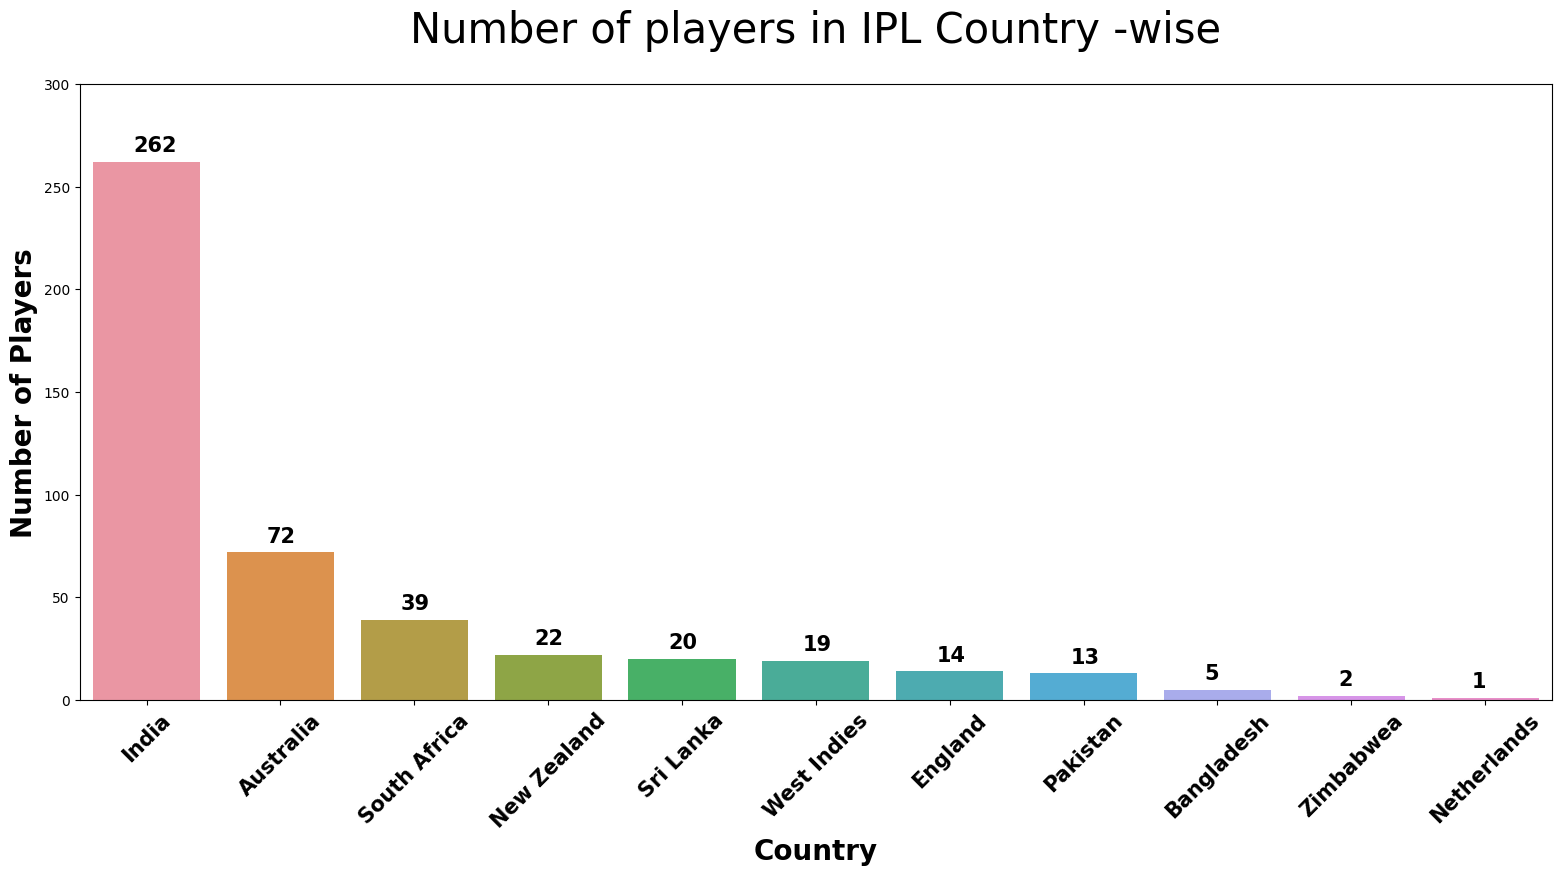

In [ ]:
#sns.set_theme(style = 'white', context = 'talk', rc = {'axes.facecolor': '#f1e7d2', 'figure.facecolor':'#f1e7d2'})
plt.figure(figsize = (19,8))
sns.barplot(x = 'Country_Name', y = 'Number_of_players', data = player_country)
plt.title('Number of players in IPL Country -wise',fontsize = 30 , pad = 30)
plt.xlabel('Country', fontsize = 20, weight = 'bold')
plt.ylabel('Number of Players', fontsize = 20, weight = 'bold')
plt.xticks(rotation = 45 , horizontalalignment='center',fontsize = 15, weight = 'black')
plt.ylim(0,300)
labels = player_country.Number_of_players.tolist()
for i in range(len(player_country)):
     plt.text(x = i - 0.1, y = player_country.iloc[i,1]+5, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

* There are 262 players from India. The majority of the foreign players are from Australia and South Africa with 72 and 39 layers respectively. 
* There is a single player from Netherlands.

##### Number of matches played in each stadium

In [ ]:
stadium_count = pd.read_sql('''
      SELECT Venue_Name, Count(*) AS Number_of_matches FROM Match
      LEFT JOIN Venue ON Venue.Venue_Id = Match.Venue_Id
      GROUP BY Venue_Name
      ORDER BY Number_of_matches DESC
      ''' , conn)

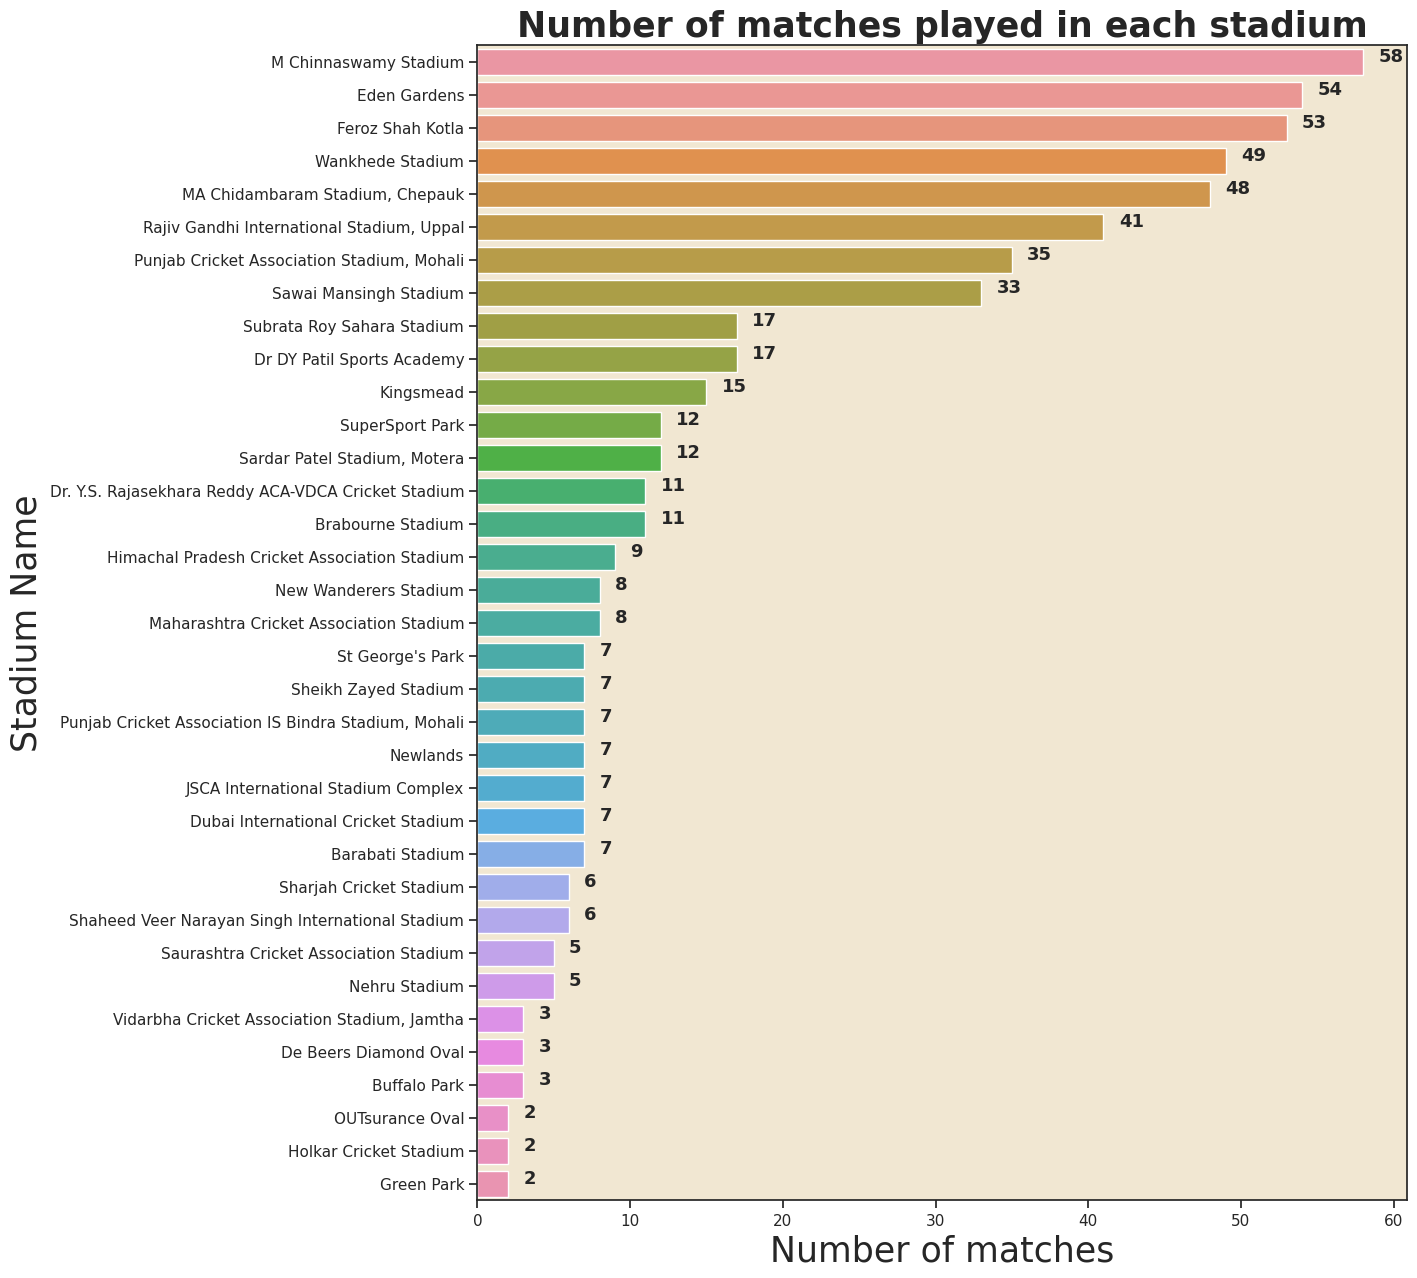

In [ ]:
plt.figure(figsize = (12,15))
sns.set_theme(style = 'ticks',rc={'axes.facecolor':'#f1e7d2', 'figure.facecolor':'#f1e7d2'})
sns.barplot(y = 'Venue_Name', x = 'Number_of_matches', data = stadium_count)
plt.title('Number of matches played in each stadium', fontsize = 25, weight = 'extra bold')
plt.xlabel('Number of matches', fontsize = 25, weight = 'roman')
plt.ylabel('Stadium Name', fontsize = 25, weight = 'roman')
#Place labels on the side of the bars
labels = stadium_count.Number_of_matches.tolist()
for i in range(len(stadium_count)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = stadium_count.iloc[i,1] + 1, y = i, s = (labels[i]), fontsize = 13, weight = 750)
plt.show()

* The highest number of matches are played in M Chinnaswamy Stadium. follwed by Eden Gardens.

##### Number of matches played in each city

In [ ]:
 city_country = pd.read_sql('''
      SELECT City_Name, 
             COUNT(*) AS Number_of_matches
      FROM Match
      LEFT JOIN Venue ON Venue.Venue_Id = Match.Venue_Id
      LEFT JOIN City ON City.City_id = Venue.City_Id
      GROUP BY City_Name
      ORDER BY Number_of_matches DESC
      ''', conn)

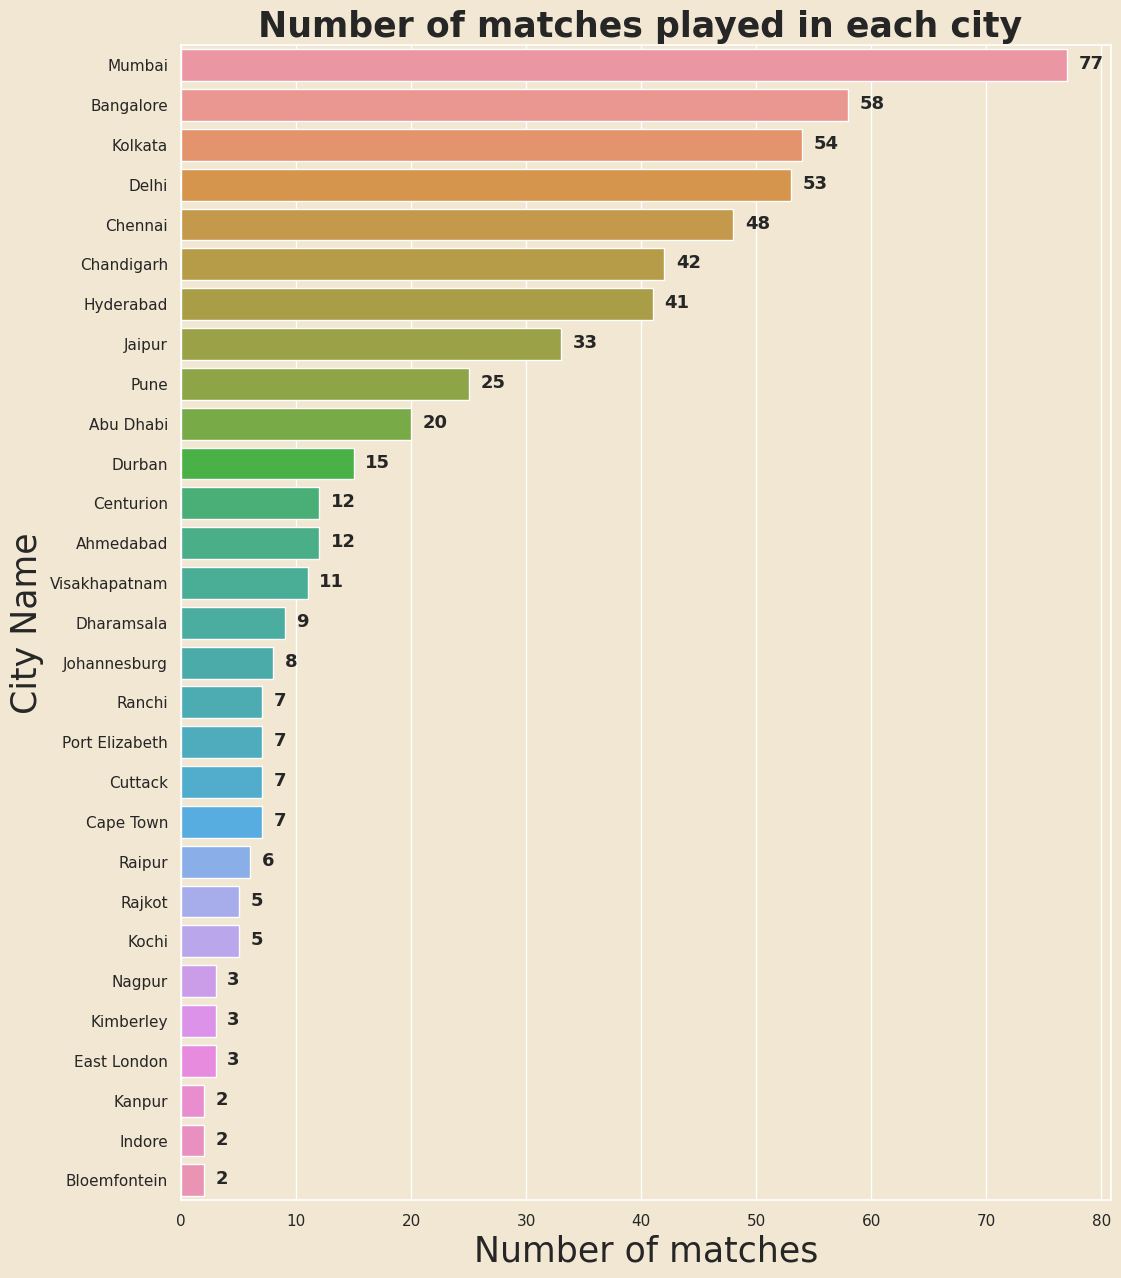

In [ ]:
sns.set_context('poster')
sns.set_style('whitegrid')
sns.set(rc={'axes.facecolor':'#f1e7d2', 'figure.facecolor':'#f1e7d2'})
plt.figure(figsize = (12,15))
sns.barplot(y = 'City_Name', x = 'Number_of_matches', data = city_country)
plt.title('Number of matches played in each city ', fontsize = 25, weight = 'bold')
plt.xlabel('Number of matches', fontsize = 25)
plt.ylabel('City Name', fontsize = 25)
labels = city_country.Number_of_matches.tolist()
for i in range(len(city_country)):
    plt.text(x = city_country.iloc[i,1] + 1, y = i +0.1, s = (labels[i]), fontsize = 13, weight = 750)
plt.show()

* The highest number of matches are played in Mumbai followed by Bangalore and Kolkata.

##### How the toss decisions changed over the seasons

In [ ]:
toss_frequency  = pd.read_sql('''
       SELECT  Season_year, 
               Toss_Name, 
               Count(Toss_Name) AS Frequency FROM Match 
       LEFT JOIN Team ON Team.Team_Id = Match.Toss_Winner
       LEFT JOIN Toss_Decision ON Toss_Decision.Toss_Id = Match.Toss_Decide
       LEFT JOIN  Season On Season.Season_Id = Match.Season_Id
       GROUP BY Season_year, Toss_Name
       ''', conn)

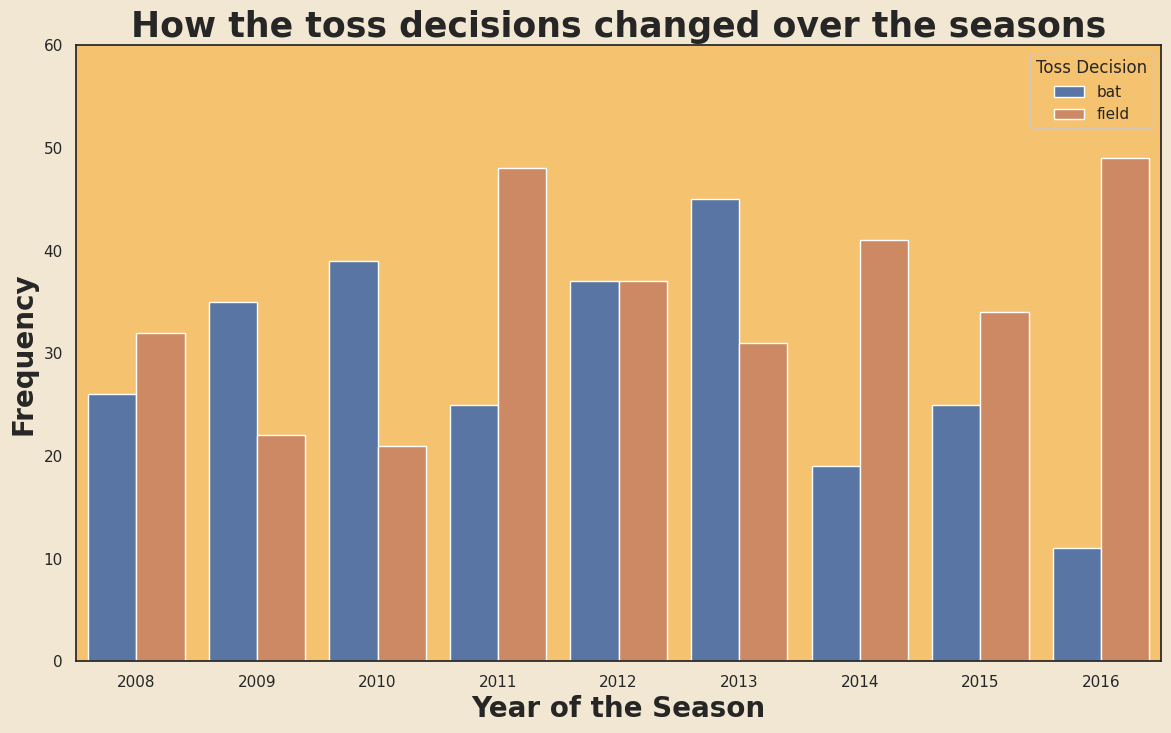

In [ ]:
plt.figure(figsize = (14,8))
sns.set_theme(style = 'white',rc={'axes.facecolor':'#F5C26F', 'figure.facecolor':'#F5C26F'})
sns.barplot(x = 'Season_Year', y = 'Frequency',hue = 'Toss_Name', data = toss_frequency)
plt.title('How the toss decisions changed over the seasons',fontsize = 25 , weight = 'black')
plt.xlabel('Year of the Season',fontsize = 20 , weight = 'black')
plt.ylabel('Frequency', fontsize = 20 , weight = 'black')
plt.ylim(0,60)
plt.legend(title = 'Toss Decision')
plt.show()

* We can observe that the teams who won the toss prefered to bat first in the initial seasons but from the last 3 season teams are choosing to field first and in the 2016 season field first was the predominant choice.

##### How the toss decisions changed over the seasons

In [ ]:
pd.read_sql('''
        SELECT  Season_year, 
                mos.Player_Name as Man_of_the_series,
                orange.Player_Name as Orange_cap,
                purple.Player_Name as Purple_cap
                FROM Match 
        LEFT JOIN Team ON Team.Team_Id = Match.Toss_Winner
        LEFT JOIN Toss_Decision ON Toss_Decision.Toss_Id = Match.Toss_Decide
        LEFT JOIN  Season On Season.Season_Id = Match.Season_Id
        LEFT JOIN Player  AS mos ON mos.Player_Id = Season.Man_of_the_Series
        LEFT JOIN Player AS orange ON orange.Player_Id = Season.Orange_Cap
        LEFT JOIN Player AS purple on purple.Player_Id = Season.Purple_Cap
        GROUP BY 1
        ''', conn)

,Season_Year,Man_of_the_series,Orange_cap,Purple_cap
0,2008,SR Watson,SE Marsh,Sohail Tanvir
1,2009,AC Gilchrist,ML Hayden,RP Singh
2,2010,SR Tendulkar,SR Tendulkar,PP Ojha
3,2011,CH Gayle,CH Gayle,SL Malinga
4,2012,SP Narine,CH Gayle,M Morkel
5,2013,SR Watson,MEK Hussey,DJ Bravo
6,2014,GJ Maxwell,RV Uthappa,MM Sharma
7,2015,AD Russell,DA Warner,DJ Bravo
8,2016,V Kohli,V Kohli,B Kumar


* The Orange Cap is presented to the leading run scorer and The Purple Cap is presented to the leading wicket-taker in the IPL.
* CH Gayle has won 2 Orange Caps and DJ Bravo has won 2 Purple Caps.

##### Total Runs scored for the over in all matches

In [ ]:
over_runs = pd.read_sql(''' 
   SELECT Over_ID AS Over_No,
        Sum(Runs_Scored) FROM Batsman_Scored
   GROUP BY Over_Id
  ''', conn)

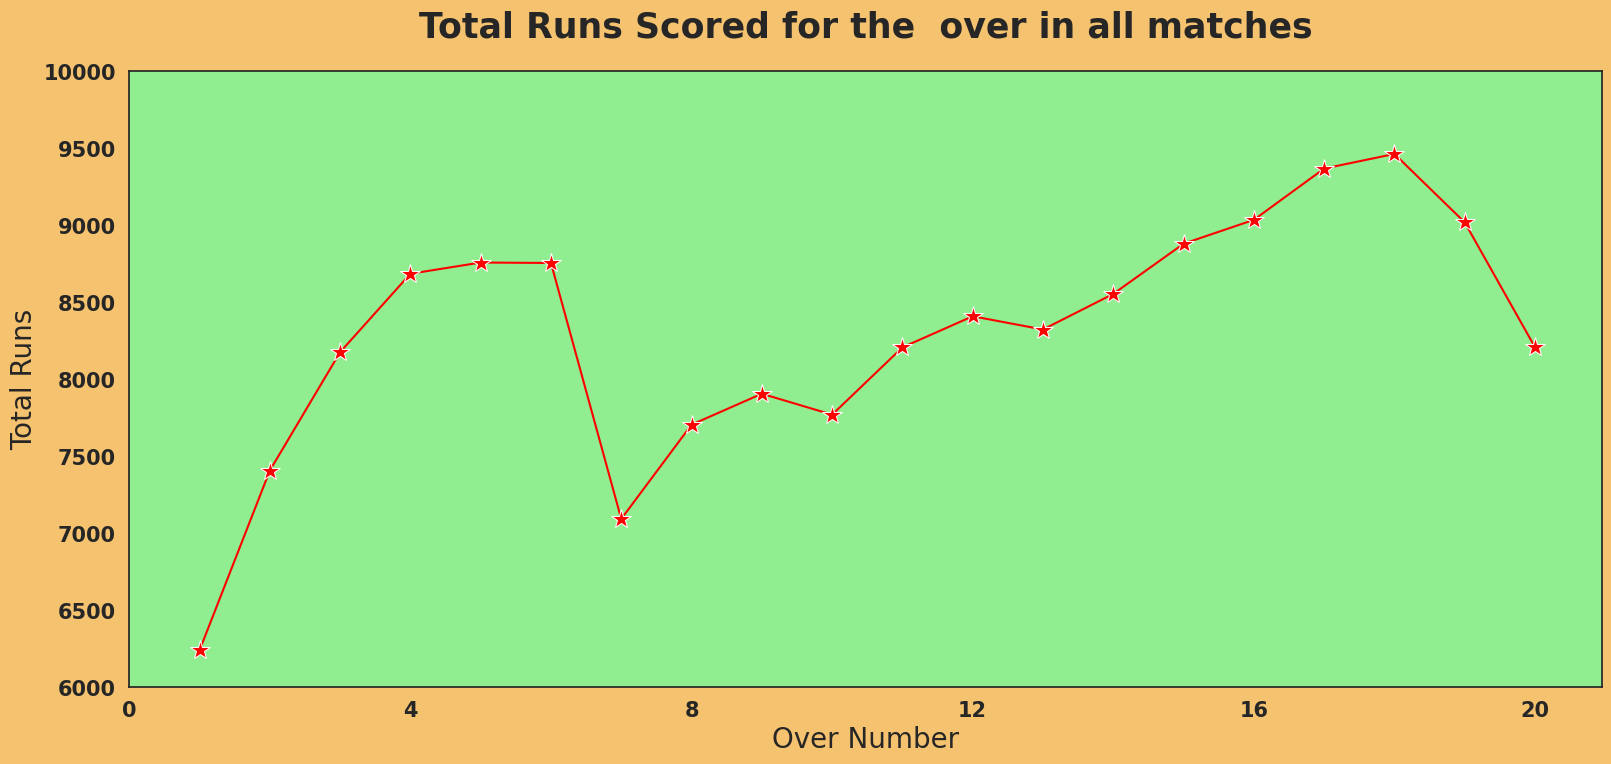

In [ ]:
plt.figure(figsize = (19,8))
sns.set_theme(style = 'white',rc={'axes.facecolor':'lightgreen', 'figure.facecolor':'lightblue'})
sns.lineplot(x = 'Over_No', y = 'Sum(Runs_Scored)', data = over_runs, marker = '*', color = 'red', markersize = 15)
plt.title('Total Runs Scored for the  over in all matches', fontsize = 25,pad = 25, weight = 1000)
plt.xlabel('Over Number', fontsize = 20)
plt.ylabel('Total Runs', fontsize = 20)
plt.xticks(ticks = [0,4,8,12,16,20], fontsize = 15, weight = 'extra bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.ylim(6000,10000)
plt.show()

The least amount of runs are made in the 1st over and the highest in the 18th over. The runs scored per over are increasing from 1st over to 6th over from then it is having a sharp drop and rising steadily and picking up momentum from 16th over onwards. The first six overs of an innings will be a mandatory powerplay, with only two fielders allowed outside the 30-yard circle. Beginning with the seventh over, no more than five fielders will be allowed outside the 30-yard circle. So the batsman are able to score more runs in the first 6 overs. The last 5 overs are commonly referred to as death overs. In these overs batting teams will be trying to score runs quicker than normal.

##### Cross Tabulation of Overs and Kind of Dismissals

In [ ]:
wicket_crosstab = pd.read_sql('''
    SELECT Over_Id, 
           COUNT(CASE WHEN Out_Name = 'caught' THEN Out_Id END) AS Caught,
           COUNT(CASE WHEN Out_Name = 'bowled' THEN Out_Id END) AS Bowled,
           COUNT(CASE WHEN Out_Name = 'run out' THEN Out_Id END) AS Run_Out,
           COUNT(CASE WHEN Out_Name = 'lbw' THEN Out_Id END) AS Lbw,
           COUNT(CASE WHEN Out_Name = 'retired hurt' THEN Out_Id END) AS Retired_hurt,
           COUNT(CASE WHEN Out_Name = 'stumped' THEN Out_Id END) AS Stumped,
           COUNT(CASE WHEN Out_Name = 'caught and bowled' THEN Out_Id END) AS Caught_and_bowled,
           COUNT(CASE WHEN Out_Name = 'hit wicket' THEN Out_Id END) AS Hit_wicket,
           COUNT(CASE WHEN Out_Name = 'obstructing the field' THEN Out_Id END) AS Obstructing_the_field
    FROM  Wicket_Taken
    JOIN  Out_Type on Out_Type.Out_Id = Wicket_Taken.Kind_Out
    GROUP BY  Over_Id
    ''', conn)

In [ ]:
wicket_crosstab.set_index('Over_Id', inplace = True)

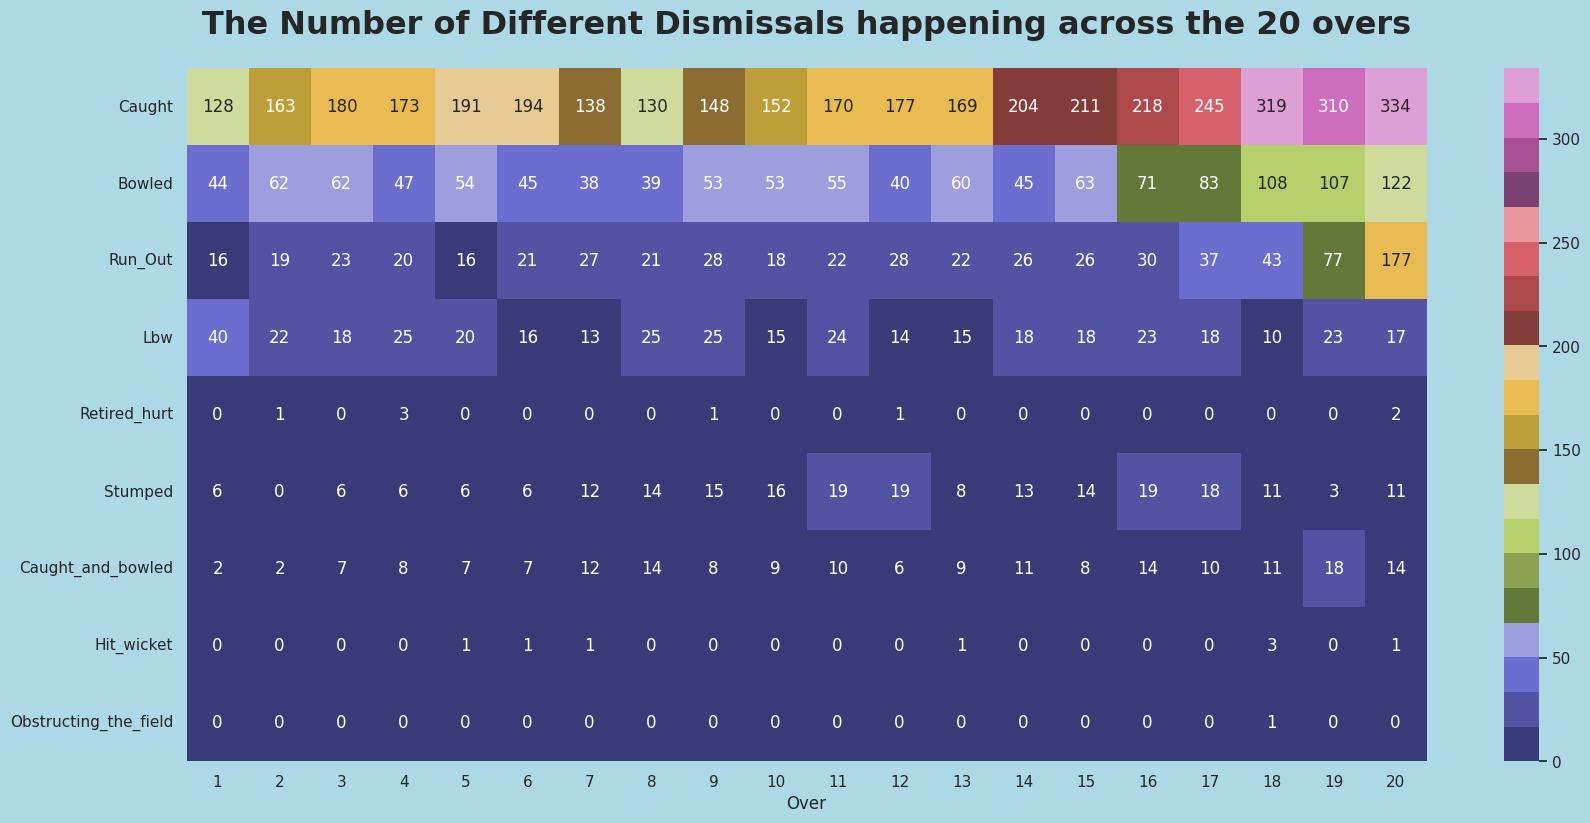

In [ ]:
plt.figure(figsize = (20,9))
sns.heatmap(wicket_crosstab.transpose(), annot = True, fmt = '.3g', cmap = 'tab20b')
plt.title('The Number of Different Dismissals happening across the 20 overs', fontsize = 23, pad = 25, weight = 'bold')
plt.xlabel('Over')
plt.show()

True to its name, death overs the last 5 overs are having most wickets. As batsman try to score more run as the innings is ending they are risking to score more runs and getting out. The most interesting is the run out dismissal in the last 2 overs. It may be because as tailenders of the batting team trying to rotate strike to the batsman who can bat well and getting out in the process. The most common way of getting out are caught, bowled, run out.

##### Total Number of Match Wins by each team

In [ ]:
pd.read_sql(''' Select *  from match
               WHERE  match_winner is null''', conn)

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,501270,6,10,2011-05-21 00:00:00,4,3,6,2,3,None,2,None,None
1,829768,2,5,2015-04-29 00:00:00,8,1,5,1,3,None,2,None,None
2,829818,2,6,2015-05-17 00:00:00,8,1,2,1,3,None,2,None,None


In [ ]:
team_wins = pd.read_sql('''
     SELECT  ifnull(Team_Name, 'No Result') as Team_Name,  Count(*) AS Number_of_wins FROM Match
     LEFT JOIN Team ON Team.Team_Id  = Match.Match_Winner
     GROUP BY Team_Name
     ORDER BY Number_of_wins DESC
     ''', conn)

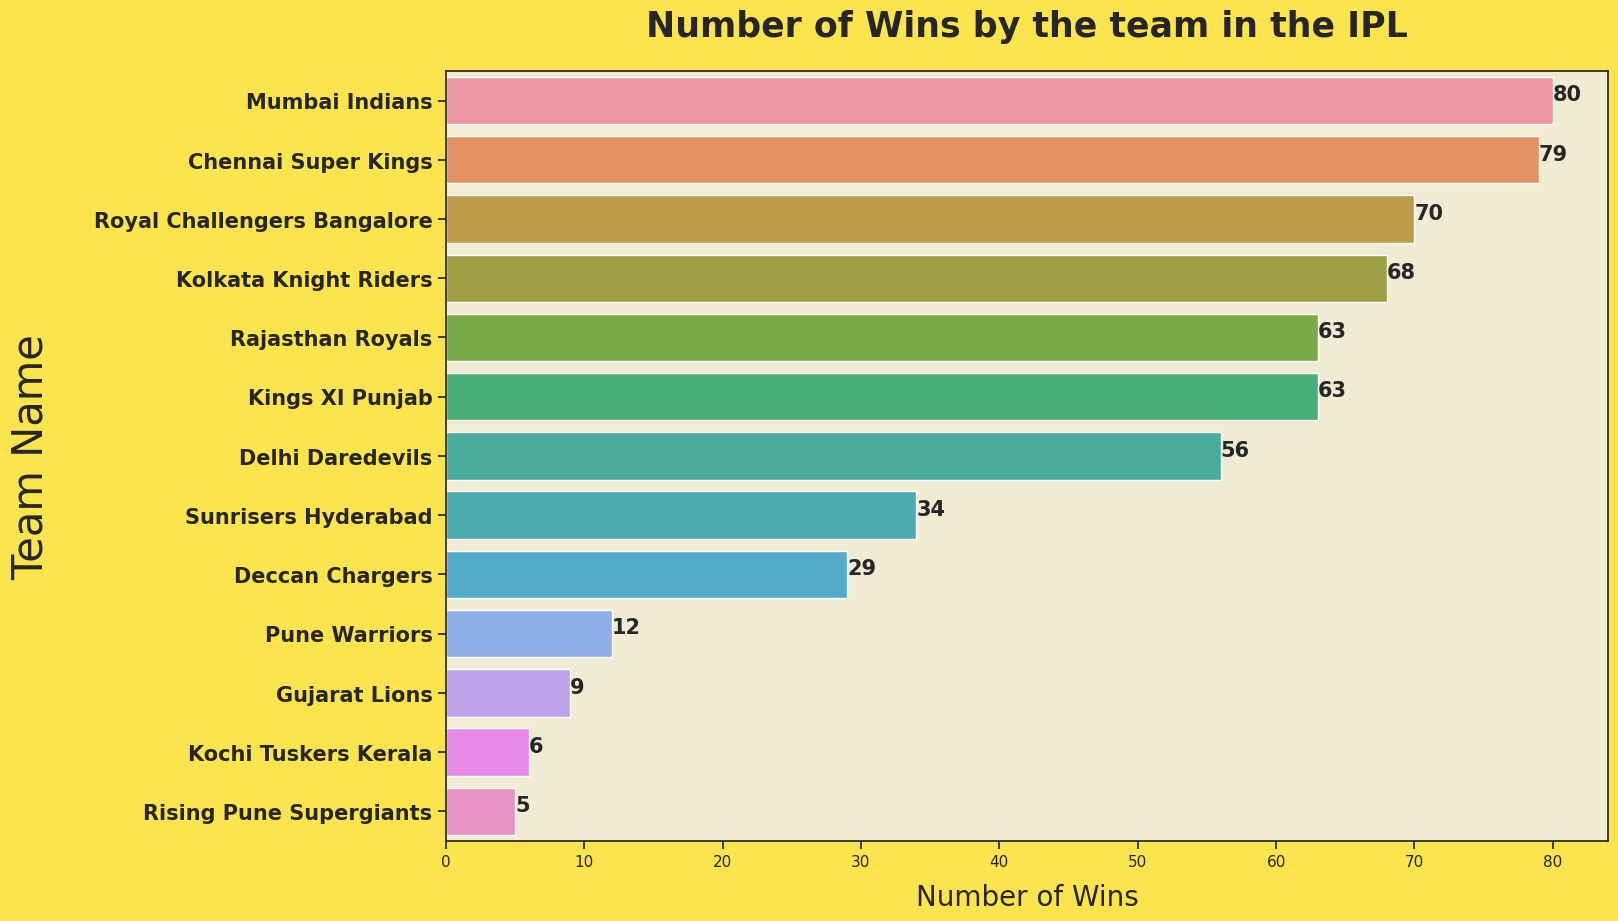

In [ ]:
sns.set_theme(style = 'ticks',rc={'axes.facecolor':'#F0ECD3', 'figure.facecolor':'#FBE44E'})
plt.figure(figsize = (15,10))
sns.barplot(y = 'Team_Name', x = 'Number_of_wins', data = team_wins.iloc[:-1,:])
plt.yticks(fontsize = 15, weight = 'bold')
plt.ylabel('Team Name', labelpad = 30, fontsize = 30)
plt.xlabel('Number of Wins', labelpad = 10, fontsize = 20, )
plt.title('Number of Wins by the team in the IPL', fontsize = 25, weight = 'bold', pad = 25)
#Place labels on the side of the bars
labels = team_wins.Number_of_wins.tolist()[:-1]
for i in range(len(team_wins)-1):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = team_wins.iloc[i,1], y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

Mumbai Indians won the highest number of matches in the all seasons from 2008 to 2016. Rising Pune Supergiants won the least number of matches. Pune Warriors ,Gujarat Lions, Kochi Tuskers Kerala, Rising Pune Supergiants have won less number of matches. These franchises got added in the later seasons of the IPl and some were dissolved too. So they could not play more number of matches.

##### Top 10 Man of the Match Award Winners

In [ ]:
mom = pd.read_sql('''
       SELECT  Player_Name,
               COUNT(*) AS MOM FROM Match
       LEFT JOIN  Player ON Player.Player_Id = Match.Man_of_the_Match 
       WHERE Player_Name IS NOT NULL
       GROUP BY Player_Name
       ORDER BY MOM DESC
       LIMIT 10
       ''', conn)

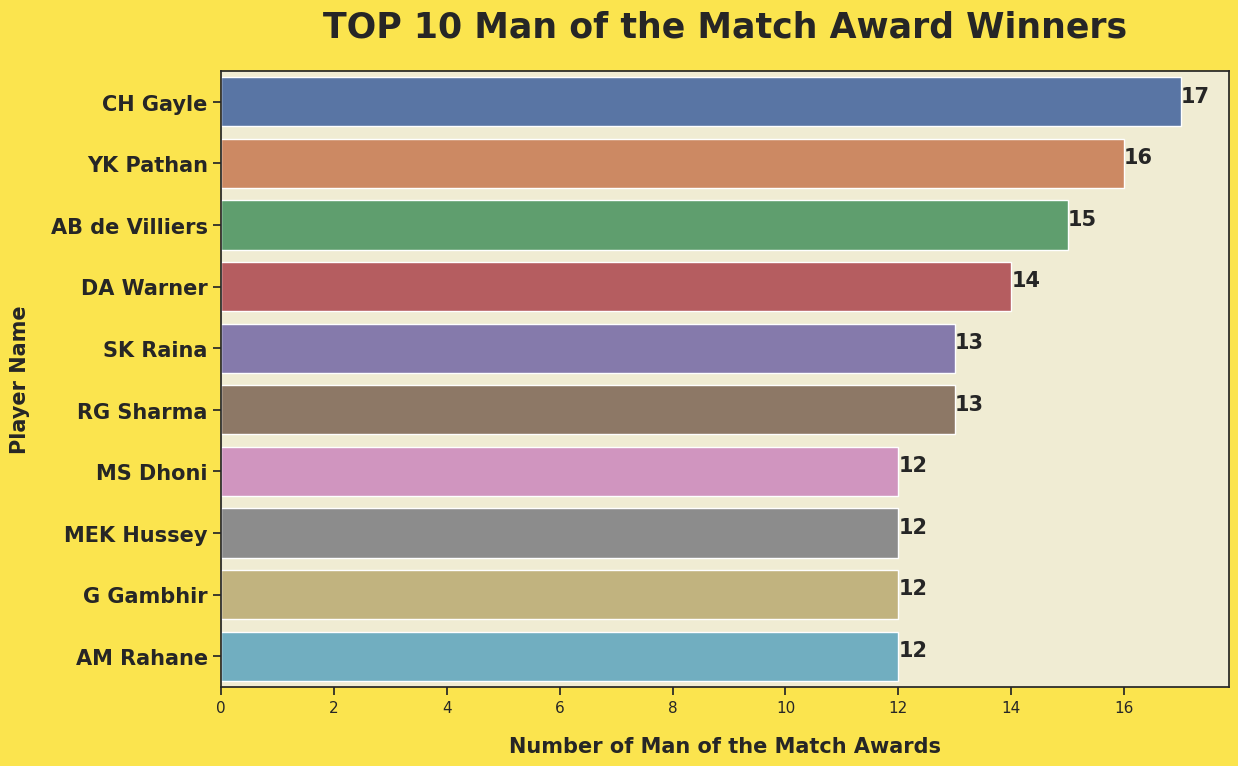

In [ ]:
sns.set_theme(style = 'ticks',rc={'axes.facecolor':'#F0ECD3', 'figure.facecolor':'#FBE44E'})
plt.figure(figsize = (13,8))
sns.barplot( y = 'Player_Name', x = 'MOM', data = mom)
plt.xlabel('Number of Man of the Match Awards', labelpad = 15, fontsize = 15, weight = 'bold')
plt.ylabel('Player Name', labelpad = 15, fontsize = 15, weight = 'bold')
plt.title('TOP 10 Man of the Match Award Winners', fontsize = 25,pad = 25, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
#Place labels on the side of the bars
labels = mom.MOM.tolist()
for i in range(len(mom)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = mom.iloc[i,1], y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

* CH Gayle has won the highest number of the Man of the Match Awards

##### Top 10 Highest Run Scorers

In [ ]:
batsman_total = pd.read_sql(''' 
      SELECT Subquery.Player_Name, 
             SUM(Subquery.Runs_Scored)  AS Total_Runs,
             COUNT(DISTINCT Subquery.Match_Id) AS No_of_Innings,
             Subquery.Batting_hand FROM 
      (SELECT 
         Ball_by_Ball.Match_Id, 
         Ball_by_Ball.Over_Id,
         Ball_by_Ball.Ball_Id,
         Ball_by_Ball.Innings_No,
         Ball_by_Ball.Team_Batting,
         Ball_by_Ball.Team_Bowling,
         Ball_by_Ball.Striker_Batting_Position,
         Ball_by_Ball.Striker,
         Ball_by_Ball.Non_Striker,
         Ball_by_Ball.Bowler,
         Batsman_Scored.Runs_Scored,
         Player.Player_Name,
         Batting_Style.Batting_hand
   FROM Ball_by_Ball 
   JOIN Batsman_Scored ON Batsman_Scored.Match_Id = Ball_by_Ball.Match_Id 
                       AND Batsman_Scored.Over_Id = Ball_by_Ball.Over_Id 
                       AND Batsman_Scored.Ball_Id = Ball_by_Ball.Ball_Id
                       AND Batsman_Scored.Innings_No = Ball_by_Ball.Innings_No
   JOIN Player ON Player.Player_Id = Ball_by_Ball.Striker
   JOIN Batting_Style ON Player.Batting_hand = Batting_Style.Batting_Id) AS Subquery
   GROUP BY Player_Name
   ORDER BY Total_Runs DESC
         
        ''', conn)

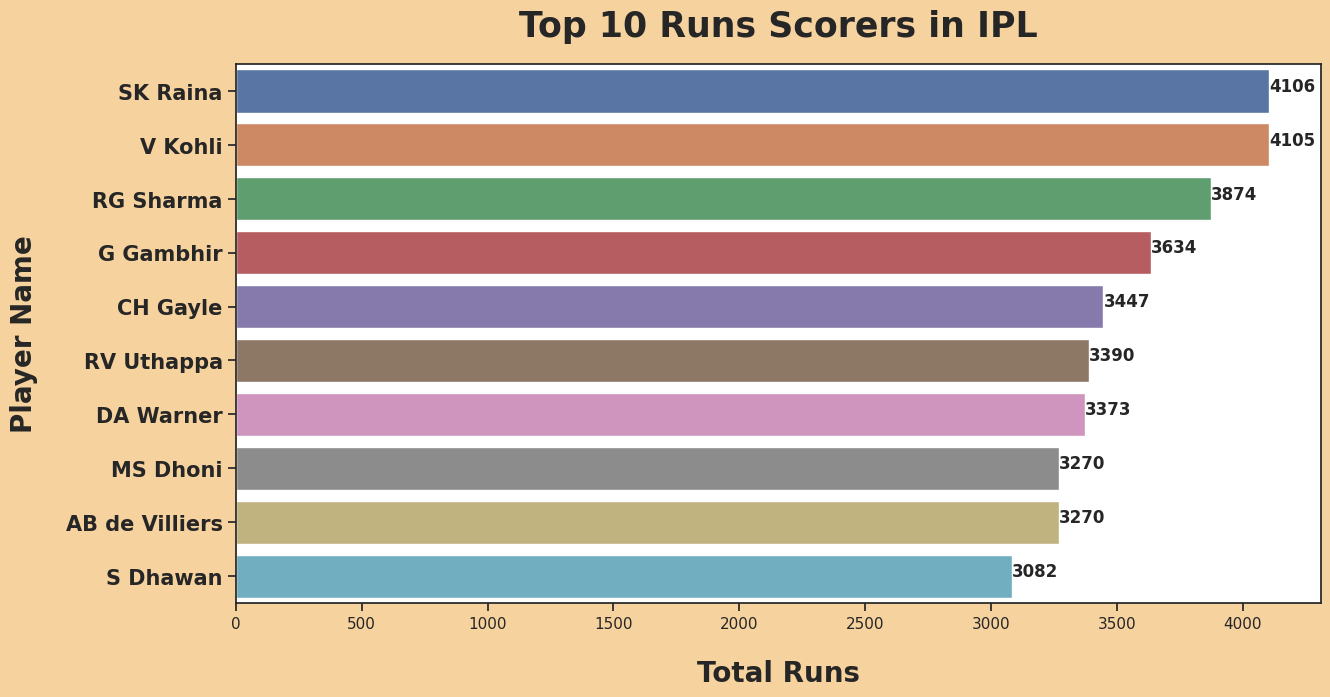

In [ ]:
sns.set_theme(style = 'ticks', rc={'axes.facecolor':'white', 'figure.facecolor':'#F6D29F'})
plt.figure(figsize = (14,7))
sns.barplot(y = 'Player_Name', x = 'Total_Runs' , data = batsman_total[:10])
plt.title('Top 10 Runs Scorers in IPL', pad = 20, fontsize  = 25, weight = 'bold')
plt.xlabel('Total Runs', labelpad = 20, fontsize = 20, weight = 'bold')
plt.ylabel('Player Name', labelpad = 20, fontsize = 20, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
#Place labels on the side of the bars
labels = batsman_total.Total_Runs.tolist()[:10]
for i in range(10):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = batsman_total.iloc[i,1], y = i, s = (labels[i]), fontsize = 12, weight = 1000)
plt.show()

SK Raina has scored the highest total runs with 4106 runs and VK Kohli with 4105 missed the top position by a whister of a single run

##### Distribution of Batsman Total Runs & Total Innings

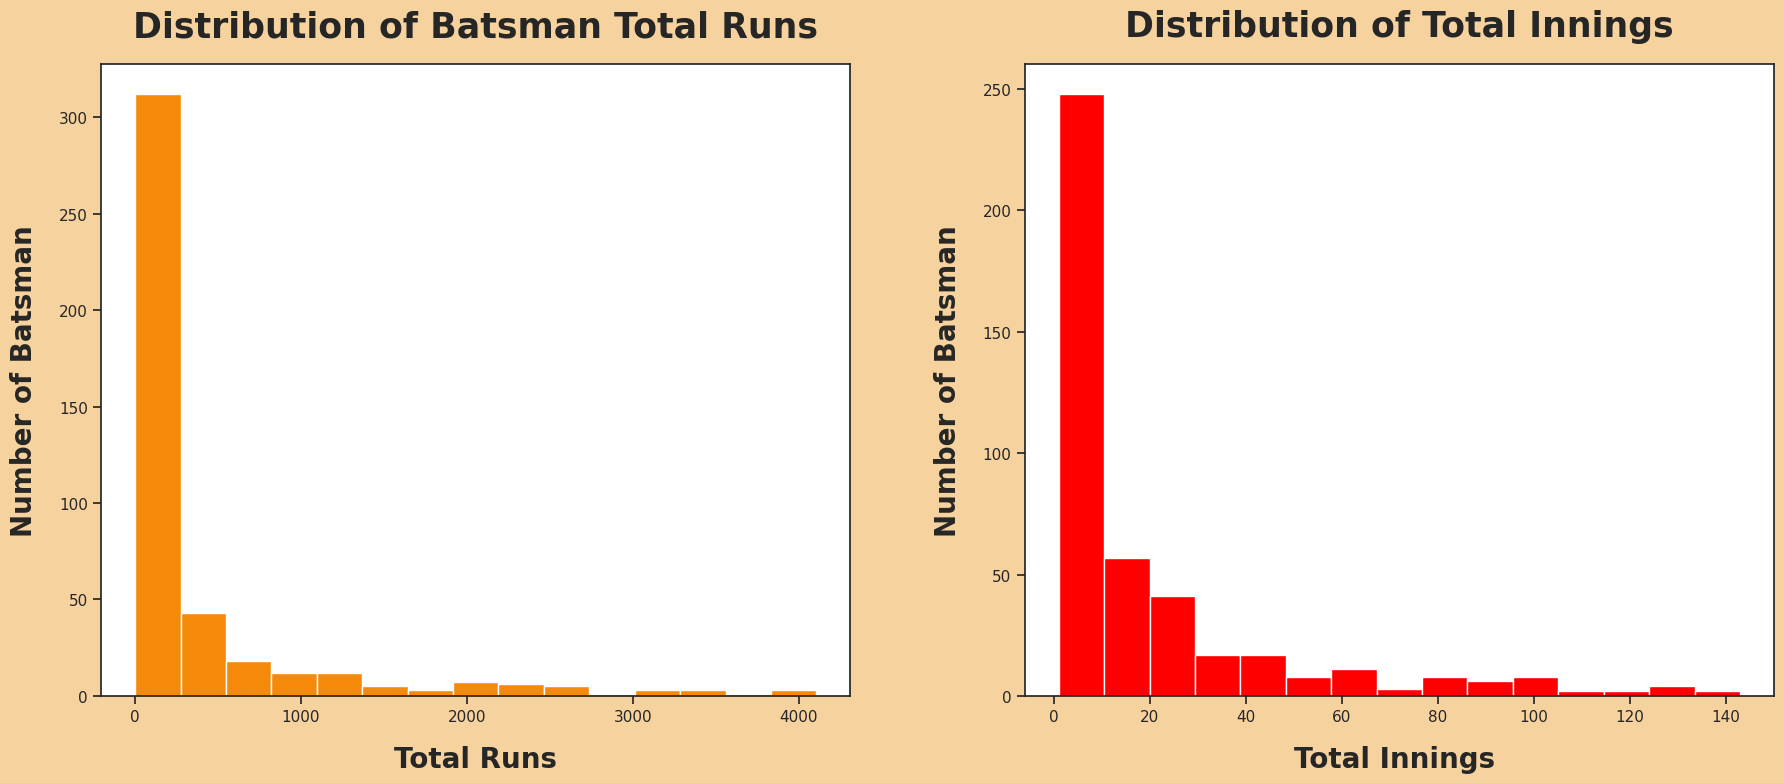

In [ ]:
sns.set_theme(style = 'ticks', rc={'axes.facecolor':'white', 'figure.facecolor':'#F6D29F'})
#Create 2 subplots
fig, ax = plt.subplots(1,2, figsize = (18,8))
sns.histplot(x = batsman_total['Total_Runs'], bins = 15,color = '#F58909',legend = False,alpha = 1, ax = ax[0])
sns.histplot(x = batsman_total.No_of_Innings, bins = 15, color = 'red', legend = False, alpha = 1, ax = ax[1])
#Style the first subplot 
ax[0].set_title('Distribution of Batsman Total Runs', pad = 20, fontsize = 25, weight = 'bold')
ax[0].set_xlabel('Total Runs', labelpad = 15, fontsize = 20, weight = 'bold')
ax[0].set_ylabel('Number of Batsman', labelpad = 15, fontsize = 20, weight = 'bold')
# Style the second subplot
ax[1].set_title('Distribution of Total Innings', pad = 20, fontsize = 25, weight = 'bold')
ax[1].set_xlabel('Total Innings ', labelpad = 15, fontsize = 20, weight = 'bold')
ax[1].set_ylabel('Number of Batsman', labelpad = 15, fontsize = 20, weight = 'bold')
fig.tight_layout(w_pad = 5)
plt.show()

* The distribution of the Total Runs and Total Innings is heavily skewed to the towards the right indicating that few players are the star players.

* Majority of players have scored less than 250 runs in total and less than 10 innings.

##### Scatter Plot of Total Runs and Innings

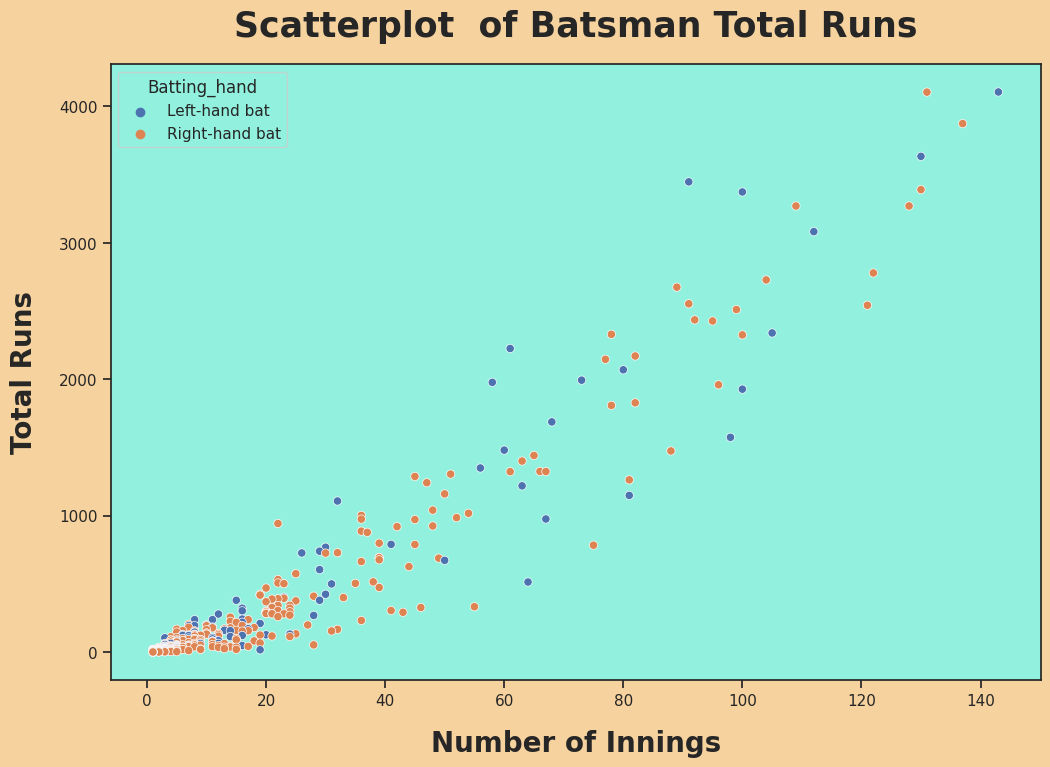

In [ ]:
plt.figure(figsize = (12,8))
sns.set_theme(style = 'ticks', context = 'notebook', rc = {'axes.facecolor': '#91F1DE', 'figure.facecolor': '#F1E491'})
sns.scatterplot(x= 'No_of_Innings', y = 'Total_Runs', hue = 'Batting_hand', data = batsman_total, facecolor = 'red')
plt.title('Scatterplot  of Batsman Total Runs', pad = 20, fontsize = 25, weight = 'bold', alpha = 1)
plt.xlabel('Number of Innings', labelpad = 15, fontsize = 20, weight = 'bold')
plt.ylabel('Total Runs', labelpad = 15, fontsize = 20, weight = 'bold')
plt.show()

Most of the batsman are right handed and out of 9 players with more than 120 innings, 7 are right handed batsman.

##### Frequency Distribution of Various Dismissals Type

In [ ]:
dismissals = pd.read_sql(''' 
        SELECT Out_Name, COUNT(Out_Name) as Number_of_outs FROM wicket_taken
        LEFT JOIN Out_Type ON Out_Type.Out_Id =  wicket_taken.Kind_Out
        GROUP BY Out_Name
        ORDER BY 2 
        
        ''', conn)

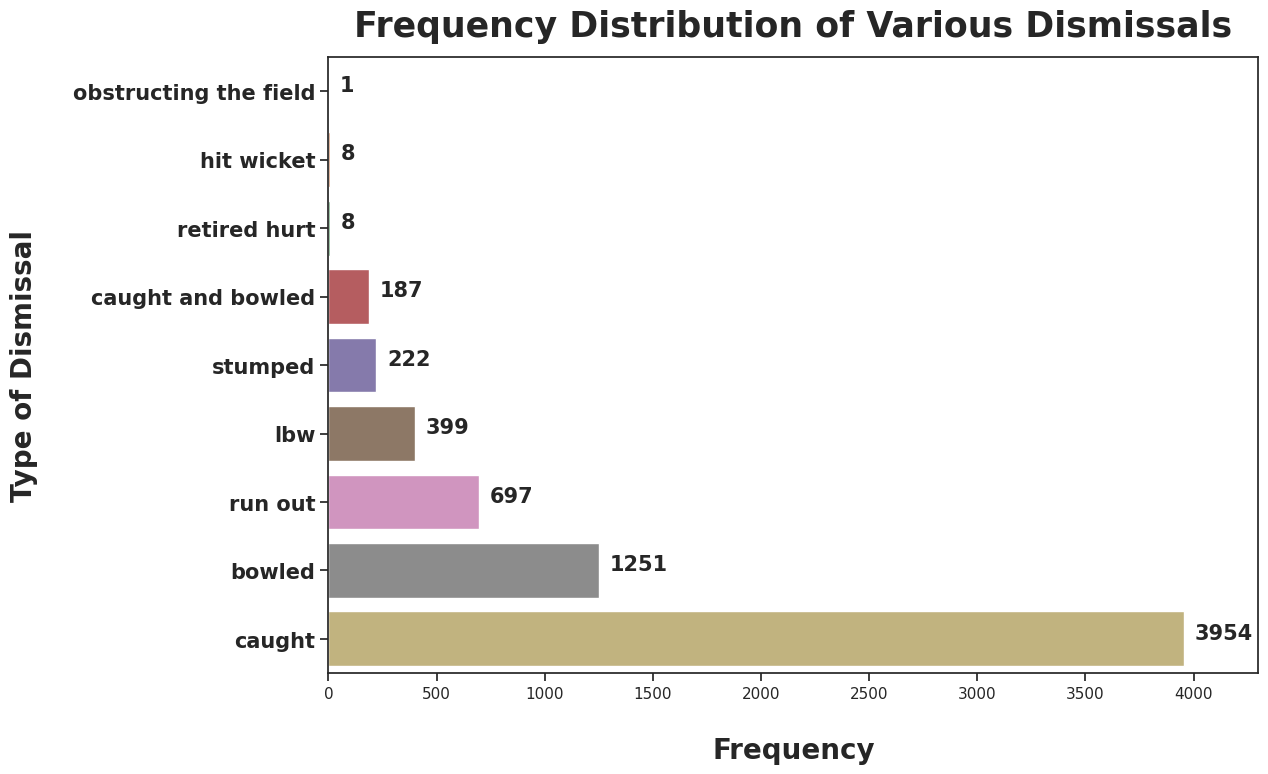

In [ ]:
sns.set_style('ticks')
plt.figure(figsize = (12,8))
sns.barplot(y = 'Out_Name', x = 'Number_of_outs', data = dismissals)
plt.title('Frequency Distribution of Various Dismissals', pad = 15, fontsize = 25, weight = 'bold')
plt.xlabel('Frequency', fontsize = 20, labelpad = 25, weight = 'bold')
plt.ylabel('Type of Dismissal', fontsize = 20, labelpad = 25, weight = 'bold')
plt.yticks(fontsize = 15, weight = 'bold')
plt.xlim(0,4300)
#Place labels on the side of the bars
labels = dismissals.Number_of_outs.tolist()
for i in range(len(dismissals)):
    # Pass the x and y coordinates of the label to place in graph
    plt.text(x = dismissals.iloc[i,1]+ 50, y = i, s = (labels[i]), fontsize = 15, weight = 1000)
plt.show()

3954 batsman got out by getting caught followed by bowled , run out. . Only one batsman got out by obstructing the fielder in all the IPL matches.

##### Top 10 Players who got out Maximum times

In [ ]:
pd.read_sql('''SELECT  Ball_by_Ball.Match_Id,
           Ball_by_Ball.Over_Id,
           Ball_by_Ball.Ball_Id,
           Ball_by_Ball.Innings_No,
           Ball_by_Ball.Team_Batting,
           Ball_by_Ball.Team_Bowling,
           Ball_by_Ball.Striker_Batting_Position,
           striker.Player_Name AS Striker_Name,
           non_striker.Player_Name AS NonStriker_Name,
           bowler.Player_Name AS Bowler_Name,
           Wicket_Taken.Player_Out,
           player_out.Player_Name AS Player_Out_Name,
           Out_Type.Out_Name,
           Wicket_Taken.Fielders 
    FROM Ball_by_Ball 
   JOIN Wicket_Taken ON Wicket_Taken.Match_Id =  Ball_by_Ball.Match_Id
                     AND Wicket_Taken.Over_Id =  Ball_by_Ball.Over_Id
                     AND Wicket_Taken.Ball_Id =  Ball_by_Ball.Ball_Id
                     AND Wicket_Taken.Innings_No =  Ball_by_Ball.Innings_No 
    JOIN Player striker ON striker.Player_Id = Ball_by_Ball.Striker
    JOIN Player non_striker ON non_striker.Player_Id = Ball_by_Ball.Non_Striker
    JOIN Player bowler ON bowler.Player_Id = Ball_by_Ball.Bowler
    JOIN Player player_out ON player_out.Player_Id = Wicket_Taken.Player_Out
    JOIN Out_Type ON Out_Type.Out_Id = Wicket_Taken.Kind_out''', conn).head()

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker_Name,NonStriker_Name,Bowler_Name,Player_Out,Player_Out_Name,Out_Name,Fielders
0,335987,2,1,2,2,1,1,R Dravid,W Jaffer,I Sharma,6,R Dravid,bowled,NaN
1,335987,3,2,2,2,1,3,V Kohli,W Jaffer,AB Dinda,8,V Kohli,bowled,NaN
2,335987,5,5,2,2,1,4,JH Kallis,W Jaffer,AB Agarkar,9,JH Kallis,caught,83.0
3,335987,6,2,1,1,2,1,SC Ganguly,BB McCullum,Z Khan,1,SC Ganguly,caught,9.0
4,335987,6,2,2,2,1,2,W Jaffer,CL White,AB Dinda,7,W Jaffer,caught,3.0


In [ ]:
number_outs = pd.read_sql(''' 
   SELECT subquery.Player_Out_Name,
          COUNT(subquery.Player_Out_Name) AS Number_Of_Outs FROM 
   (SELECT  Ball_by_Ball.Match_Id,
           Ball_by_Ball.Over_Id,
           Ball_by_Ball.Ball_Id,
           Ball_by_Ball.Innings_No,
           Ball_by_Ball.Team_Batting,
           Ball_by_Ball.Team_Bowling,
           Ball_by_Ball.Striker_Batting_Position,
           Ball_by_Ball.Striker,
           striker.Player_Name AS Striker_Name,
           Ball_by_Ball.Non_Striker,
           non_striker.Player_Name AS NonStriker_Name,
           Ball_by_Ball.Bowler,
           bowler.Player_Name AS Bowler_Name,
           Wicket_Taken.Player_Out,
           player_out.Player_Name AS Player_Out_Name,
           Wicket_Taken.Kind_Out, 
           Out_Type.Out_Name,
           Wicket_Taken.Fielders 
    FROM Ball_by_Ball 
   JOIN Wicket_Taken ON Wicket_Taken.Match_Id =  Ball_by_Ball.Match_Id
                     AND Wicket_Taken.Over_Id =  Ball_by_Ball.Over_Id
                     AND Wicket_Taken.Ball_Id =  Ball_by_Ball.Ball_Id
                     AND Wicket_Taken.Innings_No =  Ball_by_Ball.Innings_No 
    JOIN Player striker ON striker.Player_Id = Ball_by_Ball.Striker
    JOIN Player non_striker ON non_striker.Player_Id = Ball_by_Ball.Non_Striker
    JOIN Player bowler ON bowler.Player_Id = Ball_by_Ball.Bowler
    JOIN Player player_out ON player_out.Player_Id = Wicket_Taken.Player_Out
    JOIN Out_Type ON Out_Type.Out_Id = Wicket_Taken.Kind_out) AS subquery
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
                     ''',conn)

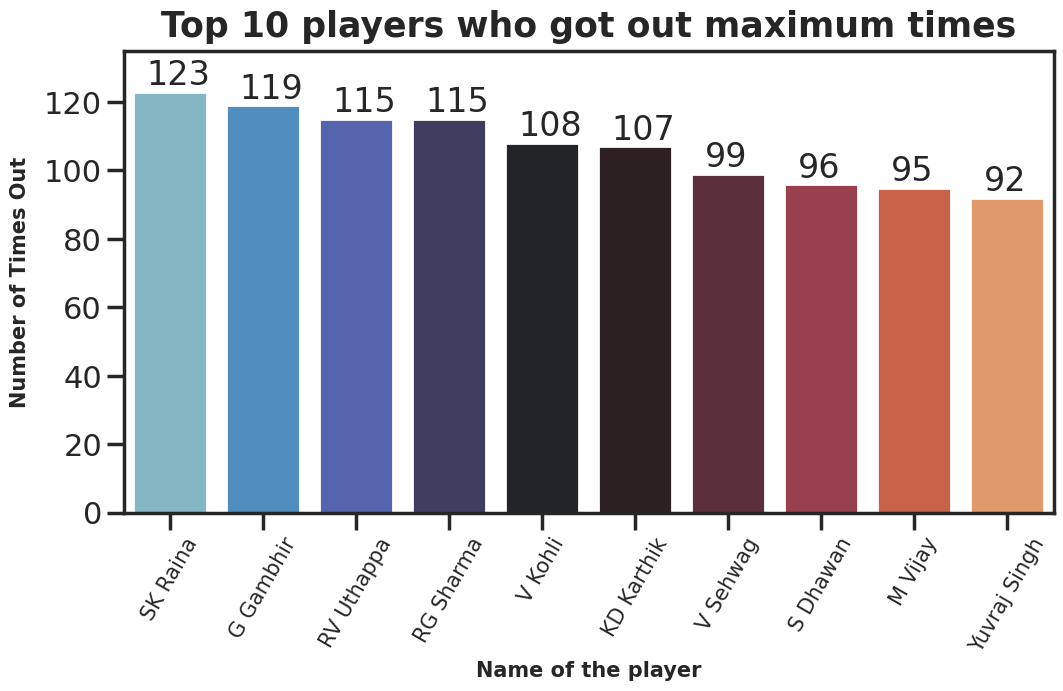

In [ ]:
plt.figure(figsize = (12,6))
sns.set_theme(style = 'ticks', context = 'poster',rc={'axes.facecolor':'white', 'figure.facecolor':'#F6EAE8'})
sns.barplot(x = 'Player_Out_Name', y = 'Number_Of_Outs', data = number_outs, palette = 'icefire')
plt.title('Top 10 players who got out maximum times', pad = 10, fontsize = 25, weight = 'extra bold')
plt.xlabel('Name of the player', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Times Out', fontsize = 15,labelpad = 10, weight = 'bold')
plt.xticks(rotation = 60 , fontsize = 15)
plt.ylim(0,135)
labels = number_outs.Number_Of_Outs.tolist()
for i in range(len(number_outs)):
    plt.text(x = i -0.25, y = number_outs.iloc[i,1] + 2, s= labels[i])
plt.show()

SK Raina got out maximum times getting out 123 times.

##### Top 10 Wicket Takers

In [ ]:
wicket_takers = pd.read_sql(''' 
   SELECT subquery.Bowler_Name,
          COUNT(subquery.Bowler_Name) AS Number_Of_Wickets 
          FROM 
   (SELECT Ball_by_Ball.Match_Id,
           Ball_by_Ball.Over_Id,
           Ball_by_Ball.Ball_Id,
           Ball_by_Ball.Innings_No,
           Ball_by_Ball.Team_Batting,
           Ball_by_Ball.Team_Bowling,
           Ball_by_Ball.Striker_Batting_Position,
           Ball_by_Ball.Striker,
           striker.Player_Name AS Striker_Name,
           Ball_by_Ball.Non_Striker,
           non_striker.Player_Name AS NonStriker_Name,
           Ball_by_Ball.Bowler,
           bowler.Player_Name AS Bowler_Name,
           Wicket_Taken.Player_Out,
           player_out.Player_Name AS Player_Out_Name,
           Wicket_Taken.Kind_Out, 
           Out_Type.Out_Name,
           Wicket_Taken.Fielders 
    FROM Ball_by_Ball 
    JOIN Wicket_Taken ON Wicket_Taken.Match_Id =  Ball_by_Ball.Match_Id
                     AND Wicket_Taken.Over_Id =  Ball_by_Ball.Over_Id
                     AND Wicket_Taken.Ball_Id =  Ball_by_Ball.Ball_Id
                     AND Wicket_Taken.Innings_No =  Ball_by_Ball.Innings_No 
    JOIN Player striker ON striker.Player_Id = Ball_by_Ball.Striker
    JOIN Player non_striker ON non_striker.Player_Id = Ball_by_Ball.Non_Striker
    JOIN Player bowler ON bowler.Player_Id = Ball_by_Ball.Bowler
    JOIN Player player_out ON player_out.Player_Id = Wicket_Taken.Player_Out
    JOIN Out_Type ON Out_Type.Out_Id = Wicket_Taken.Kind_out ) AS subquery
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 10
    ''',conn)

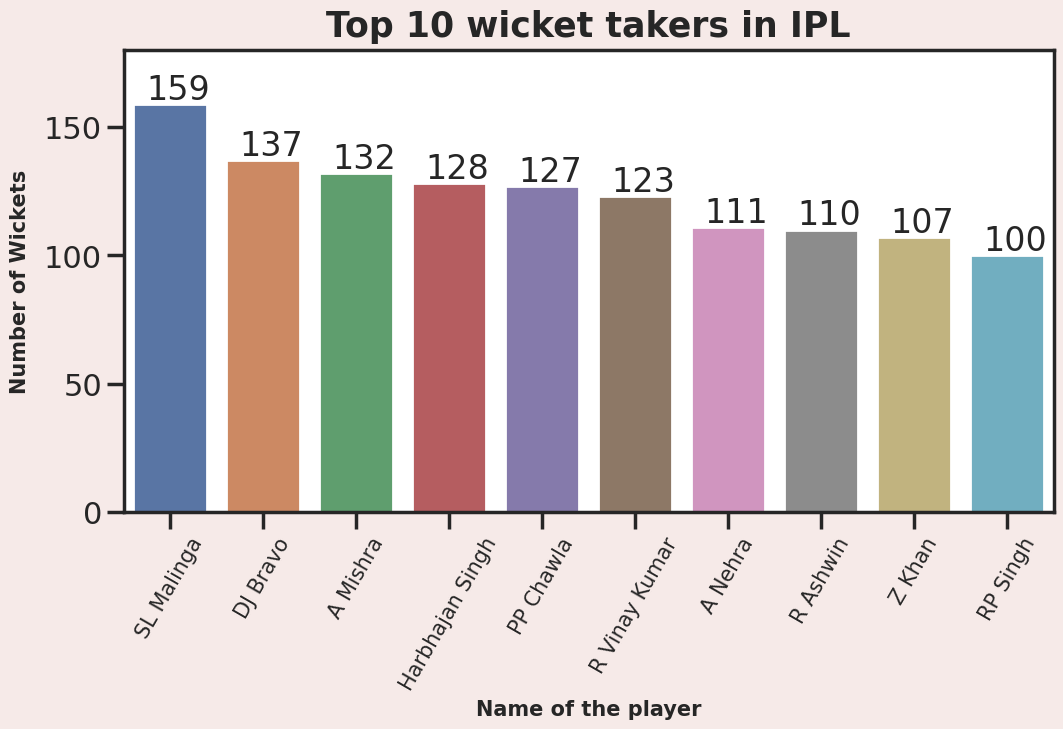

In [ ]:
plt.figure(figsize = (12,6))
sns.set_theme(style = 'ticks', context = 'poster',rc={'axes.facecolor':'white', 'figure.facecolor':'#F6EAE8'})
sns.barplot(x = 'Bowler_Name', y = 'Number_Of_Wickets', data = wicket_takers)
plt.title('Top 10 wicket takers in IPL', pad = 10, fontsize = 25, weight = 'extra bold')
plt.xlabel('Name of the player', fontsize = 15, weight = 'bold')
plt.ylabel('Number of Wickets', fontsize = 15,labelpad = 10, weight = 'bold')
plt.xticks(rotation = 60 , fontsize = 15)
plt.ylim(0,180)
labels = wicket_takers.Number_Of_Wickets.tolist()
for i in range(len(wicket_takers)):
    plt.text(x = i -0.25, y = wicket_takers.iloc[i,1] + 2, s= labels[i])
plt.show()

* SL Malinga is the top wicket taker with 159 wickets

##### Variation in Total Extras in a Match Over Time

In [ ]:
extras = pd.read_sql('''
  SELECT  Match_id, 
          SUM(Extra_Runs) AS Total_Extras 
  FROM extra_runs
  GROUP BY 1
  ''', conn)

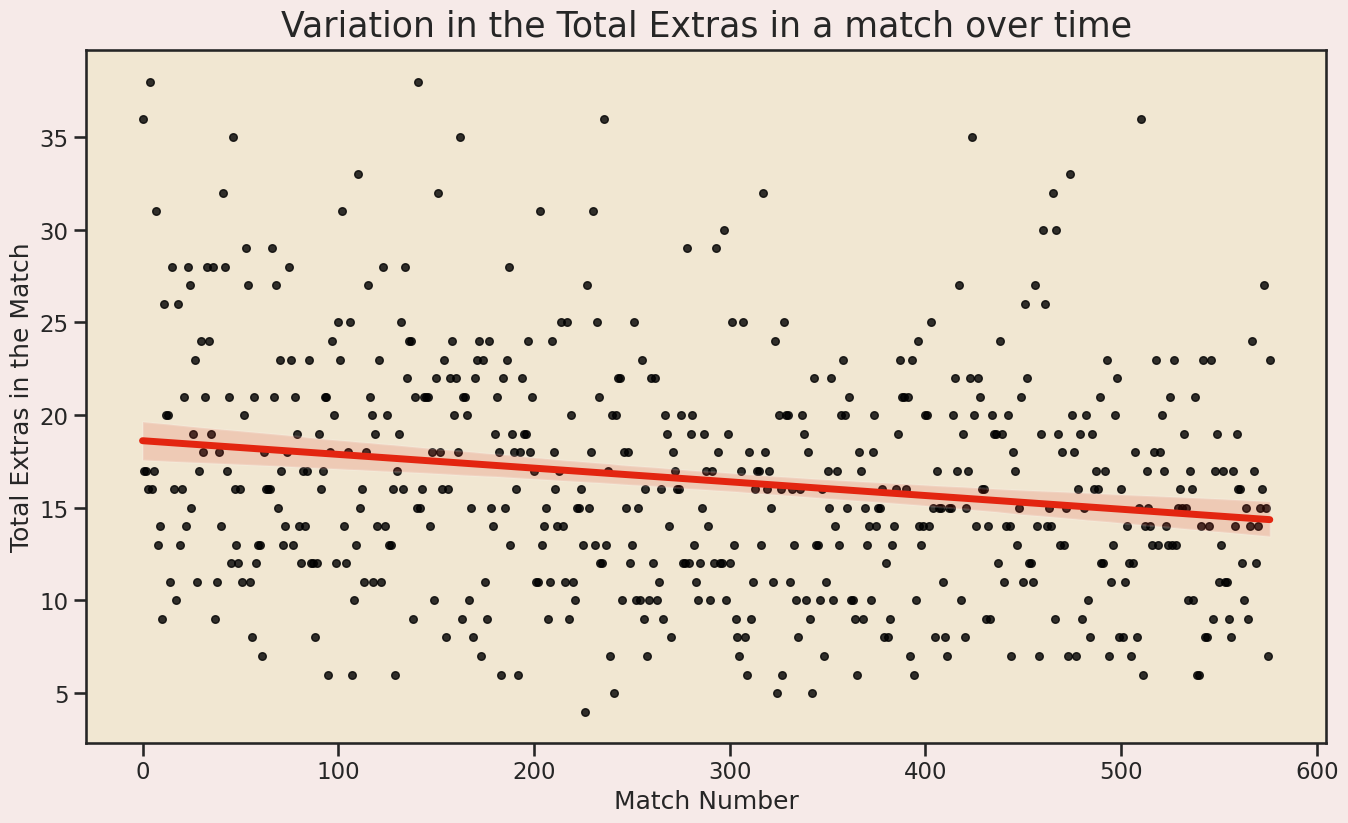

In [ ]:
plt.figure(figsize = (16,9))
sns.set_theme(style = 'ticks', context = 'talk',rc={'axes.facecolor':'#f1e7d2', 'figure.facecolor':'#f1e7d2'})
sns.regplot(x = extras.index, y = extras.Total_Extras, data = extras, color = 'black', scatter_kws = {'s':30}, line_kws= {'color' : '#E32510', 'linewidth' : 5})
plt.title('Variation in the Total Extras in a match over time', pad = 10, fontsize = 25)
plt.xlabel('Match Number')
plt.ylabel('Total Extras in the Match')
plt.show()

* There is a decreasing trend in the total extra runs in a match over time. That means bowlers are getting better and being careful not to award extra runs.

##### Batting Runs and Innings

In [ ]:
## Query 21 Batsman vs runs

pd.read_sql("""
select * from (
select
a.striker,
count(distinct a.match_id) as Batting_innings,
a.striker_name,
a.role_desc,
a.batting_hand,
sum(a.runs) as runs
from
(
select
byb.match_id as match_id,
byb.over_id as over_id,
byb.ball_id as ball_id,
byb.innings_no as innings_no,
byb.team_batting as team_batting,
striker,
non_striker,
bowler,
role_desc,
bs.batting_hand as batting_hand,
pl.player_name as striker_name,
runs_scored as Runs from ball_by_ball byb
join batsman_scored bsco on byb.ball_id= bsco.ball_id and byb.match_id= bsco.match_id and byb.over_id= bsco.over_id and byb.innings_no= bsco.innings_no
join player_match pm on bsco.match_id = pm.match_id
join player pl on byb.striker= pl.player_id
join rolee re on pm.role_id=re.role_id
join batting_Style bs on pl.batting_hand=bs.batting_id
group by
striker,
byb.match_id,
byb.over_id,
byb.ball_id
order by bsco.innings_no asc
)a
group by a.striker_name
order by a.striker
) b
order by b.runs desc
""", conn).head()

,striker,Batting_innings,striker_name,role_desc,batting_hand,runs
0,21,143,SK Raina,Player,Left-hand bat,4106
1,8,131,V Kohli,Captain,Right-hand bat,4105
2,57,137,RG Sharma,Captain,Right-hand bat,3874
3,40,130,G Gambhir,Player,Left-hand bat,3634
4,162,91,CH Gayle,Player,Left-hand bat,3431


##### Bowler best Bowling Figures

In [ ]:
pd.read_sql("""
select
a.match_id,
a.bowler,
max(a.wickets),
a.runs_given,
max(a.wickets) ||'-'|| a.runs_given AS Best_Bowling_figure

from (
select
wt.match_id,
wt.bowler,
wt.wickets,
rt.runs_given

from
(
select byb.match_id,bowler, count(byb.ball_id) as wickets from 
ball_by_ball byb
join wicket_taken wkt on byb.match_id=wkt.match_id and byb.over_id=wkt.over_id and byb.ball_id=wkt.ball_id and byb.innings_no=wkt.innings_no
group by byb.match_id,bowler
) wt

join 
(select byb.match_id,bowler, sum(runs_scored) as runs_given from 
ball_by_ball byb
join batsman_scored bs on byb.match_id=bs.match_id and byb.over_id=bs.over_id and byb.ball_id=bs.ball_id and byb.innings_no=bs.innings_no
group by bs.match_id,bowler
) rt on rt.match_id=wt.match_id ) a
group by a.bowler
order by a.wickets desc
""", conn).head()

,match_id,bowler,max(a.wickets),runs_given,Best_Bowling_figure
0,980984,430,6,10,6-10
1,598061,362,6,4,6-4
2,980968,334,6,8,6-8
3,336010,102,6,2,6-2
4,729308,364,5,10,5-10


##### Bowler Stats Overall

In [ ]:
pd.read_sql("""
select
c.bowler,
c.player_name,
c.wickets,
c.economy_rate,
c.bowler_strike_rate,
best_bowling_table.best_bowling_figure
from (
select 
a.bowler,
a.player_name,
a.wickets,
balls_table.balls_bowled as Balls_bowled,
economy_table.runs_given as runs_given,
6*(round(round(economy_table.runs_given,2)/round(balls_table.balls_bowled,2),2)) as economy_rate,
round(round(balls_table.balls_bowled,2)/round(a.wickets,2),2) as bowler_strike_rate
from (
select bowler,pl.player_name as player_name,count(out_name) as wickets from wicket_taken wkt
join out_type ot on wkt.kind_out=ot.out_id
join ball_by_ball byb on byb.match_id=wkt.match_id and byb.over_id=wkt.over_id and byb.ball_id=wkt.ball_id and byb.innings_no=wkt.innings_no
join player pl on byb.bowler=pl.player_id
group by player_name
) a join (select bowler,count(ball_id) as Balls_Bowled from ball_by_ball
group by bowler) balls_table on a.bowler=balls_table.bowler join (select * from (
select
a.bowler,
count(distinct a.match_id) as Innings_Bowled,
a.bowler_name,
a.role_desc,
sum(a.runs) as runs_given
from
(
select
byb.match_id as match_id,
byb.over_id as over_id,
byb.ball_id as ball_id,
byb.innings_no as innings_no,
byb.team_batting as team_batting,
striker,
non_striker,
bowler,
role_desc,
bs.batting_hand as batting_hand,
pl.player_name as bowler_name,
runs_scored as Runs from ball_by_ball byb
join batsman_scored bsco on byb.ball_id= bsco.ball_id and byb.match_id= bsco.match_id and byb.over_id= bsco.over_id and byb.innings_no= bsco.innings_no
join player_match pm on bsco.match_id = pm.match_id
join player pl on byb.bowler= pl.player_id
join rolee re on pm.role_id=re.role_id
join batting_Style bs on pl.batting_hand=bs.batting_id
group by
striker,
byb.match_id,
byb.over_id,
byb.ball_id,
bsco.innings_no
order by bsco.innings_no asc
)a
group by a.bowler_name
order by a.bowler
) b
order by b.runs_given desc) economy_table on a.bowler=economy_table.bowler
order by a.wickets desc) c join (select
a.match_id,
a.bowler,
max(a.wickets),
a.runs_given,
max(a.wickets) ||'-'|| a.runs_given AS Best_Bowling_figure

from (
select
wt.match_id,
wt.bowler,
wt.wickets,
rt.runs_given

from
(
select byb.match_id,bowler, count(byb.ball_id) as wickets from 
ball_by_ball byb
join wicket_taken wkt on byb.match_id=wkt.match_id and byb.over_id=wkt.over_id and byb.ball_id=wkt.ball_id and byb.innings_no=wkt.innings_no
group by byb.match_id,bowler
) wt

join 
(select byb.match_id,bowler, sum(runs_scored) as runs_given from 
ball_by_ball byb
join batsman_scored bs on byb.match_id=bs.match_id and byb.over_id=bs.over_id and byb.ball_id=bs.ball_id and byb.innings_no=bs.innings_no
group by bs.match_id,bowler
) rt on rt.match_id=wt.match_id ) a
group by a.bowler
order by a.wickets desc) best_bowling_table on c.bowler=best_bowling_table.bowler
""", conn).head()

,bowler,player_name,wickets,economy_rate,bowler_strike_rate,Best_Bowling_figure
0,194,SL Malinga,159,6.00,15.14,5-7
1,71,DJ Bravo,137,7.56,15.40,4-6
2,136,A Mishra,132,6.90,18.68,5-17
3,50,Harbhajan Singh,128,6.66,21.42,5-13
4,67,PP Chawla,127,7.32,19.46,4-9


##### Conclusions

* There are 262 players from India. The majority of the foreign players are from Australia and South Africa with 72 and 39 players respectively. There is a single player from Netherlands.
* The highest number of matches are played in M Chinnaswamy Stadium. follwed by Eden Gardens.
* The highest number of matches are played in Mumbai followed by Bangalore and Kolkata.
* The teams who won the toss prefered to bat first in the initial seasons but from the last 3 season teams are choosing to field first and in the 2016 season field first was the predominant choice.
* CH Gayle has won 2 Orange Caps and DJ Bravo has won 2 Purple Caps.


* The least amount of runs are made in the 1st over and the highest in the 18th over. The runs scored per over are increasing from 1st over to 6th over from then it is having a sharp drop and rising steadily and picking up momentum from 16th over onwards. The first six overs of an innings will be a mandatory powerplay, with only two fielders allowed outside the 30-yard circle. Beginning with the seventh over, no more than five fielders will be allowed outside the 30-yard circle. So the batsman are able to score more runs in the first 6 overs. The last 5 overs are commonly referred to as death overs. In these overs batting teams will be trying to score runs quicker than normal.
* True to its name, death overs the last 5 overs are having most wickets. As batsman try to score more run as the innings is ending they are risking to score more runs and getting out. The most interesting is the run out dismissal in the last 2 overs. It may be because as tailenders of the batting team trying to rotate strike to the batsman who can bat well and getting out in the process. The most common way of getting out are caught, bowled, run out.
* Mumbai Indians won the highest number of matches in the all seasons from 2008 to 2016. Rising Pune Supergiants won the least number of matches. Pune Warriors ,Gujarat Lions, Kochi Tuskers Kerala, Rising Pune Supergiants have won less number of matches. These franchises got added in the later seasons of the IPl and some were dissolved too. So they could not play more number of matches.
* CH Gayle has won the highest number of the Man of the Match Awards.
* SK Raina has scored the highest total runs with 4106 runs and VK Kohli with 4105 missed the top position by a whister of a single run.
* The distribution of the Total Runs and Total Innings is heavily skewed to the towards the right indicating that few players are the star players. Majority of players have scored less than 250 runs in total and less than 10 innings.
* Most of the batsman are right handed and out of 9 players with more than 120 innings, 7 are right handed batsman.
* 3954 batsman got out by getting caught followed by bowled , run out. . Only one batsman got out by obstructing the fielder in all the IPL matches.
* SK Raina got out maximum times getting out 123 times.
* SL Malinga is the top wicket taker with 159 wickets
* There is a decreasing trend in the total extra runs in a match over time. That means bowlers are getting better and being careful not to award extra runs.


#### JOIN Necessary  Tables

In [ ]:
sql = """
SELECT * FROM Toss_Decision 
JOIN Match ON Toss_Decision.Toss_Id = Match.Toss_Decide
JOIN Venue ON Match.Venue_Id = Venue.Venue_Id
JOIN City ON Venue.City_Id = City.City_Id
JOIN Country ON Country.Country_Id = City.Country_Id
JOIN Season ON Season.Season_Id = Match.Season_Id
JOIN Player_Match ON Player_Match.Match_Id = Match.Match_Id
JOIN Player ON Player.Player_Id = Player_Match.Player_Id
JOIN Rolee ON Rolee.Role_Id = Player_Match.Role_Id
JOIN Extra_Runs ON Extra_Runs.Match_Id = Player_Match.Match_Id
JOIN Extra_Type ON Extra_Type.Extra_Id = Extra_Runs.Extra_Type_Id;
"""
df = pd.read_sql(sql, conn)
df.head()

,Toss_Id,Toss_Name,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,...,Role_Id,Role_Desc,Match_Id,Over_Id,Ball_Id,Extra_Type_Id,Extra_Runs,Innings_No,Extra_Id,Extra_Name
0,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,Captain,335987,1,1,1,1,1,1,legbyes
1,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,Captain,335987,1,2,2,1,2,2,wides
2,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,Captain,335987,1,3,2,1,1,2,wides
3,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,Captain,335987,1,7,1,1,1,1,legbyes
4,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,Captain,335987,2,3,1,4,2,1,legbyes


#### Remove duplicate columns

In [ ]:
df = df.T.drop_duplicates().T

#### Displaying New Data

In [ ]:
df.head()

,Toss_Id,Toss_Name,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Win_Type,...,Batting_hand,Bowling_skill,Country_Name,Role_Desc,Over_Id,Ball_Id,Extra_Type_Id,Extra_Runs,Innings_No,Extra_Name
0,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,1.0,1,Captain,1,1,1,1,1,legbyes
1,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,1.0,1,Captain,1,2,2,1,2,wides
2,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,1.0,1,Captain,1,3,2,1,1,wides
3,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,1.0,1,Captain,1,7,1,1,1,legbyes
4,1,field,335987,2,1,2008-04-18 00:00:00,1,1,2,1,...,1,1.0,1,Captain,2,3,1,4,2,legbyes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164318 entries, 0 to 164317
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Toss_Id            164318 non-null  object
 1   Toss_Name          164318 non-null  object
 2   Match_Id           164318 non-null  object
 3   Team_1             164318 non-null  object
 4   Team_2             164318 non-null  object
 5   Match_Date         164318 non-null  object
 6   Season_Id          164318 non-null  object
 7   Venue_Id           164318 non-null  object
 8   Toss_Winner        164318 non-null  object
 9   Win_Type           164318 non-null  object
 10  Win_Margin         161700 non-null  object
 11  Outcome_type       164318 non-null  object
 12  Match_Winner       163790 non-null  object
 13  Man_of_the_Match   163790 non-null  object
 14  Venue_Name         164318 non-null  object
 15  City_Id            164318 non-null  object
 16  City_Name          1

In [ ]:
df.describe()

,Toss_Id,Toss_Name,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Win_Type,...,Batting_hand,Bowling_skill,Country_Name,Role_Desc,Over_Id,Ball_Id,Extra_Type_Id,Extra_Runs,Innings_No,Extra_Name
count,164318,164318,164318,164318,164318,164318,164318,164318,164318,164318,...,164318,151250.0,164318,164318,164318,164318,164318,164318,164318,164318
unique,2,2,577,13,13,407,9,35,13,4,...,2,14.0,11,4,20,9,5,5,4,5
top,1,field,829742,2,7,2010-03-25 00:00:00,4,1,7,2,...,2,2.0,1,Player,1,1,2,1,1,wides
freq,91608,91608,572,23012,24112,924,20592,17710,22594,84678,...,118354,40695.0,105970,137598,11484,28226,91366,145310,85074,91366


#### Sending Dataframe to Excel file

In [ ]:
# Write the DataFrame to a new CSV file
df.to_csv('output.csv', index=False)

## Part 2: Python Analysis

### Importing Data

In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/IE6700 Project/output.csv")
df.head()

,Toss_Id,Toss_Name,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Win_Type,...,Batting_hand,Bowling_skill,Country_Name.1,Role_Desc,Over_Id,Ball_Id,Extra_Type_Id,Extra_Runs,Innings_No,Extra_Name
0,1,field,335987,2,1,18-04-2008 00:00,1,1,2,1,...,1,1.0,1,Captain,1,1,1,1,1,legbyes
1,1,field,335987,2,1,18-04-2008 00:00,1,1,2,1,...,1,1.0,1,Captain,1,2,2,1,2,wides
2,1,field,335987,2,1,18-04-2008 00:00,1,1,2,1,...,1,1.0,1,Captain,1,3,2,1,1,wides
3,1,field,335987,2,1,18-04-2008 00:00,1,1,2,1,...,1,1.0,1,Captain,1,7,1,1,1,legbyes
4,1,field,335987,2,1,18-04-2008 00:00,1,1,2,1,...,1,1.0,1,Captain,2,3,1,4,2,legbyes


### Exploratory Data Analysis

#### Dropping Unimportant Columns

In [8]:
df = df.drop(['Match_Id','Match_Date','DOB','Toss_Name','Venue_Name','City_Name','Country_Name','Player_Name','Role_Desc','Extra_Name'], axis=1)

#### Null Values in Data

In [9]:
null_counts = df.isnull().sum()
print(null_counts)

Toss_Id                  0
Team_1                   0
Team_2                   0
Season_Id                0
Venue_Id                 0
Toss_Winner              0
Win_Type                 0
Win_Margin            2618
Outcome_type             0
Match_Winner           528
Man_of_the_Match       528
City_Id                  0
Country_id               0
Man_of_the_Series        0
Orange_Cap               0
Purple_Cap               0
Season_Year              0
Player_Id                0
Role_Id                  0
Team_Id                  0
Batting_hand             0
Bowling_skill        13068
Country_Name.1           0
Over_Id                  0
Ball_Id                  0
Extra_Type_Id            0
Extra_Runs               0
Innings_No               0
dtype: int64


#### Drop Null Values in Data

In [10]:
df = df.dropna()

In [11]:
null_counts = df.isnull().sum()
print(null_counts)

Toss_Id              0
Team_1               0
Team_2               0
Season_Id            0
Venue_Id             0
Toss_Winner          0
Win_Type             0
Win_Margin           0
Outcome_type         0
Match_Winner         0
Man_of_the_Match     0
City_Id              0
Country_id           0
Man_of_the_Series    0
Orange_Cap           0
Purple_Cap           0
Season_Year          0
Player_Id            0
Role_Id              0
Team_Id              0
Batting_hand         0
Bowling_skill        0
Country_Name.1       0
Over_Id              0
Ball_Id              0
Extra_Type_Id        0
Extra_Runs           0
Innings_No           0
dtype: int64


In [12]:
"""
corr_matrix = df.corr()

# set figure size
plt.figure(figsize=(20, 17))

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()
"""

"\ncorr_matrix = df.corr()\n\n# set figure size\nplt.figure(figsize=(20, 17))\n\n# create a heatmap of the correlation matrix\nsns.heatmap(corr_matrix, annot=True, cmap='coolwarm')\n\n# show the plot\nplt.show()\n"

#### Splitting Data Into Train Test Data

In [13]:
# Storing and retrieving the updated dataframe
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/IE6700 Project/Updated_Data.csv')

In [14]:
target = "Win_Margin"
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.3, random_state=42)

### Regression Analysis

#### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

# calculate the R-squared score
r2_L = r2_score(y_test, y_pred)
print("R-squared score:", r2_L)

Mean squared error: 389.90231705889676
Mean absolute error: 12.598544073741124
R-squared score: 0.2939066349532883


#### Decision Tree Regressor

In [17]:
# Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_D = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2_D)

Mean Squared Error (MSE):  73.056193329879
Root Mean Squared Error (RMSE):  8.547291578615942
R-squared (R2):  0.8676989309145211


#### Random Forest Regression

In [18]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regression model
model = RandomForestRegressor(n_estimators=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_RF = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2_RF)

Mean Squared Error (MSE):  45.60242158938594
Root Mean Squared Error (RMSE):  6.752956507292635
R-squared (R2):  0.9174163222285636


### Comparision Of Models

In [19]:
Model = ['Linear Regression', 'Decision Tree', 'Random Forest']
R2_Score = [r2_L, r2_D, r2_RF]
data = {'Model': Model, 'R2_Score': R2_Score}
pd.DataFrame(data)

,Model,R2_Score
0,Linear Regression,0.293907
1,Decision Tree,0.867699
2,Random Forest,0.917416
